## ***PROJET MACHINE LEARNING : Implementation d'un model de recommandation de repas***

# ***Phase 1 : Business understanding***

+ CLASSIFICATION 

**🎯BO 1** : Trouver rapidement des recettes personnalisées, adaptées à ses goûts, à son régime alimentaire (ex. végétarien, faible en calories) et à ses habitudes de consommation.

**📊DSO 1:** Mettre en place un système de recommandation intelligent capable de proposer des recettes personnalisées en fonction des préférences des utilisateurs, de leur régime alimentaire et de leurs habitudes de consommation, en s’appuyant sur des approches de filtrage collaboratif et/ou de filtrage par contenu.

**📊Algorithme à appliquer :**
SVM

**📊Pourquoi ?**
Classifier les recettes adaptées à un utilisateur selon son profil (préférences et régime).




**🎯BO 2 :** Identifier les facteurs qui influencent la popularité d’une recette, afin de comprendre pourquoi certaines plaisent davantage et comment les optimiser pour obtenir de meilleures évaluations.

**📊DSO 2 :** Analyser les données de notation et de consommation des recettes afin de mettre en évidence les corrélations et les associations entre les caractéristiques des recettes (ingrédients, temps de préparation, valeurs nutritionelles, etc.) et leur popularité, en utilisant des techniques comme les règles d’association.

**📊Algorithme à appliquer :**
Règles d’association

**📊Pourquoi ?**
Identifier les patterns d’ingrédients et caractéristiques qui rendent une recette populaire.

**🎯 BO 3** :Anticiper la note qu’une recette pourrait obtenir en fonction de ses caractéristiques (ingrédients, valeurs nutritionnelles, catégorie), afin d’évaluer son potentiel de succès.

**📊 DSO 3** :Développer un modèle de régression capable de prédire la note d’une recette à partir de ses caractéristiques, et identifier les variables les plus influentes grâce à des techniques telles que la régression linéaire.

**📊Algorithme à appliquer :**
Régression linéaire

**📊Pourquoi ?**
Prédiction de notes numériques, simple et interprétable

**🎯BO 4 :**
Proposer des campagnes marketing personnalisées et adaptées à leurs profils et préférences.

**📊 DSO 4 :**
Segmenter les utilisateurs existants (ex. sportifs, gourmets, healthy) en groupes homogènes à l’aide d’algorithmes de clustering tels que K-Means, DBSCAN ou le clustering hiérarchique, afin d’identifier des profils types pour un marketing ciblé.

**📊Algorithme à appliquer :**
K-Means

**📊Pourquoi ?**
Segmenter les utilisateurs en groupes homogènes pour marketing ciblé.

**🎯BO 5 :** Identifier le type de cuisine d’une recette en se basant sur ses ingrédients et regrouper les recettes  selon leurs similarités (nutrition, ingrédients, préférences), afin de faciliter la découverte de nouvelles recettes et améliorer les recommandations personnalisées.

**📊 DSO 5 :**
Utiliser des techniques d’apprentissage non supervisé pour regrouper les recettes  en fonction de leurs caractéristiques et ingrédients, et prédire le type de cuisine d’une recette à partir de sa composition.

**📊Algorithme à appliquer :**
ACP + DBSCAN

**📊Pourquoi ?**
Réduire la dimension des ingrédients (ACP) puis regrouper les recettes similaires (DBSCAN).

# ***Phase 2 : Data understanding***

### **1. Importations necessaires**

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import re
import ast
from sklearn.preprocessing import MultiLabelBinarizer
from collections import Counter

from itertools import chain
from mlxtend.frequent_patterns import apriori
from scipy.stats import pearsonr, spearmanr


### **2. Charger le dataset**

In [110]:
recipes = pd.read_csv('recipes.csv')
reviews = pd.read_csv('reviews.csv')

La dataset est formée de 2 dataframes : les données sur les recettes se trouvent dans "recipes" et les données des users/profiles dans "reviews".

### a. Explication de colonne par colonne : 

#### i. Recipes : 

| Nom de la colonne              | Signification / Référence               |          Type        |
| ------------------------------ | --------------------------------------- | -------------------- |
| **RecipeId**                   | Identifiant unique de la recette        | `int64`              |
| **Name**                       | Nom de la recette                       | `object` (str)       |
| **AuthorId**                   | Identifiant de l’auteur                 | `int64`              |
| **AuthorName**                 | Nom de l’auteur                         | `object` (str)       |
| **CookTime**                   | Temps de cuisson (ISO 8601)             | `object` (str)       |
| **PrepTime**                   | Temps de préparation (ISO 8601)         | `object` (str)       |
| **TotalTime**                  | Temps total pour préparer et cuire      | `object` (str)       |
| **DatePublished**              | Date de publication de la recette       | `datetime64[ns]`     |
| **Description**                | Description ou résumé de la recette     | `object` (str)       |
| **Images**                     | URL ou chemin de l’image de la recette  | `object` (str)       |
| **RecipeCategory**             | Catégorie de la recette                 | `object` (str)       |
| **Keywords**                   | Mots-clés associés à la recette         | `object` (str)       |
| **RecipeIngredientQuantities** | Quantité des ingrédients                | `object` (str)       |
| **RecipeIngredientParts**      | Nom des ingrédients                     | `object` (str)       |
| **AggregatedRating**           | Note moyenne de la recette              | `float64`            |
| **ReviewCount**                | Nombre d’avis                           | `int64`              |
| **Calories**                   | Valeur énergétique totale               | `float64`            |
| **FatContent**                 | Quantité totale de matières grasses (g) | `float64`            |
| **SaturatedFatContent**        | Quantité de graisses saturées (g)       | `float64`            |
| **CholesterolContent**         | Teneur en cholestérol (mg)              | `float64`            |
| **SodiumContent**              | Teneur en sodium (mg)                   | `float64`            |
| **CarbohydrateContent**        | Quantité de glucides (g)                | `float64`            |
| **FiberContent**               | Quantité de fibres (g)                  | `float64`            |
| **SugarContent**               | Quantité de sucres (g)                  | `float64`            |
| **ProteinContent**             | Quantité de protéines (g)               | `float64`            |
| **RecipeServings**             | Nombre de portions                      | `int64`              |
| **RecipeYield**                | Rendement ou quantité finale obtenue    | `object` (str)       |
| **RecipeInstructions**         | Étapes de préparation de la recette     | `object` (str)       |


#### ii. Reviews : 

| Nom de la colonne | Signification / Référence                   |         Type         |
| ----------------- | ------------------------------------------- | -------------------- |
| **ReviewId**      | Identifiant unique de l’avis                | `int64`              |
| **RecipeId**      | Identifiant de la recette associée à l’avis | `int64`              |
| **AuthorId**      | Identifiant de l’auteur de l’avis           | `int64`              |
| **AuthorName**    | Nom de l’auteur de l’avis                   | `object` (str)       |
| **Rating**        | Note donnée à la recette                    | `int64`              |
| **Review**        | Texte de l’avis / commentaire               | `object` (str)       |
| **DateSubmitted** | Date à laquelle l’avis a été soumis         | `datetime64[ns]`     |
| **DateModified**  | Date de dernière modification de l’avis     | `datetime64[ns]`     |


#### ii. Suppression de colonnes sémantiquement pas nécessaires : 

In [111]:
df_reviews = reviews.drop(
    ['AuthorId', 'AuthorName', 'DateSubmitted', 'DateModified'], 
    axis=1, 
    errors='ignore'
)

df_recipes = recipes.drop(
    ['Images', 'AuthorName', 'DatePublished', 'AuthorId'], 
    axis=1, 
    errors='ignore'
)

print("Colonnes restantes dans les recipes : \n")
print(df_recipes.columns.tolist())
print(" \n")
print("Colonnes restantes dans les reviews : \n")
print(df_reviews.columns.tolist())

Colonnes restantes dans les recipes : 

['RecipeId', 'Name', 'CookTime', 'PrepTime', 'TotalTime', 'Description', 'RecipeCategory', 'Keywords', 'RecipeIngredientQuantities', 'RecipeIngredientParts', 'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent', 'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent', 'RecipeServings', 'RecipeYield', 'RecipeInstructions']
 

Colonnes restantes dans les reviews : 

['ReviewId', 'RecipeId', 'Rating', 'Review']


### b. Les dimensions du dataset

In [112]:
print("Taille des recipes : ")
print(df_recipes.shape)
print("\nTaille des reviews : ")
print(df_reviews.shape)

Taille des recipes : 
(522517, 24)

Taille des reviews : 
(1401982, 4)


##### On remarque que la dataset est très géante, donc on va procéder à la diminution de nombre de lignes :
Réduction aléatoire de recipes,

puis récupération des RecipeId disponibles

enfin, filtrage des reviews correspondantes

In [113]:
df_recipes_small = df_recipes.sample(frac=0.0025, random_state=42)

selected_ids = df_recipes_small['RecipeId'].tolist()

df_reviews_small = df_reviews[df_reviews['RecipeId'].isin(selected_ids)]


##### Les nouveaux dimensions :

In [114]:
print("Taille des recipes : ")
print(df_recipes_small.shape)
print("\nTaille des reviews : ")
print(df_reviews_small.shape)

Taille des recipes : 
(1306, 24)

Taille des reviews : 
(3231, 4)


### c. Le pourcentage des valeurs nulles du dataset par colonne :

In [115]:
null_percent_recipes = df_recipes_small.isnull().mean() * 100
print("Pourcentage de valeurs nulles par colonne (recipes) :")
print(null_percent_recipes)
null_percent_reviews = df_reviews_small.isnull().mean() * 100
print("\nPourcentage de valeurs nulles par colonne (reviews) :")
print(null_percent_reviews)


Pourcentage de valeurs nulles par colonne (recipes) :
RecipeId                       0.000000
Name                           0.000000
CookTime                      15.007657
PrepTime                       0.000000
TotalTime                      0.000000
Description                    0.000000
RecipeCategory                 0.000000
Keywords                       2.603369
RecipeIngredientQuantities     0.000000
RecipeIngredientParts          0.000000
AggregatedRating              50.000000
ReviewCount                   48.009188
Calories                       0.000000
FatContent                     0.000000
SaturatedFatContent            0.000000
CholesterolContent             0.000000
SodiumContent                  0.000000
CarbohydrateContent            0.000000
FiberContent                   0.000000
SugarContent                   0.000000
ProteinContent                 0.000000
RecipeServings                33.460949
RecipeYield                   66.385911
RecipeInstructions        

#### on remarque que 70% des records de RecipeYield sont nuls et meme les valeurs non nuls ne sont pas significatives. C'est pour ca qu'on a décider de la supprimer : 

In [116]:
df_recipes_small = df_recipes_small.drop(
    ['RecipeYield'], 
    axis=1, 
    errors='ignore'
)
print("Colonnes de recipes restantes apres suppression : \n")
print(df_recipes_small.columns.tolist())


Colonnes de recipes restantes apres suppression : 

['RecipeId', 'Name', 'CookTime', 'PrepTime', 'TotalTime', 'Description', 'RecipeCategory', 'Keywords', 'RecipeIngredientQuantities', 'RecipeIngredientParts', 'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent', 'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent', 'RecipeServings', 'RecipeInstructions']


 ### d. Description sur les colonnes

In [117]:
print(df_recipes_small.describe())
print(df_reviews_small.describe())

            RecipeId  AggregatedRating  ReviewCount     Calories   FatContent  \
count    1306.000000        653.000000   679.000000  1306.000000  1306.000000   
mean   280489.841501          4.674579     4.895434   438.917305    22.739969   
std    158188.598986          0.591476    11.148606   556.876004    36.303039   
min        93.000000          1.000000     1.000000     0.000000     0.000000   
25%    147666.750000          4.500000     1.000000   161.075000     5.600000   
50%    279871.500000          5.000000     2.000000   306.300000    13.400000   
75%    421463.250000          5.000000     4.000000   497.125000    26.175000   
max    540512.000000          5.000000   157.000000  6553.300000   496.600000   

       SaturatedFatContent  CholesterolContent  SodiumContent  \
count          1306.000000         1306.000000    1306.000000   
mean              8.986753           86.191960     657.141577   
std              17.142788          206.639465    1555.217024   
min       

 ### **e. Distribution de données : ( histogrammes / boxplots )** 

 #### **i.recipes :** 

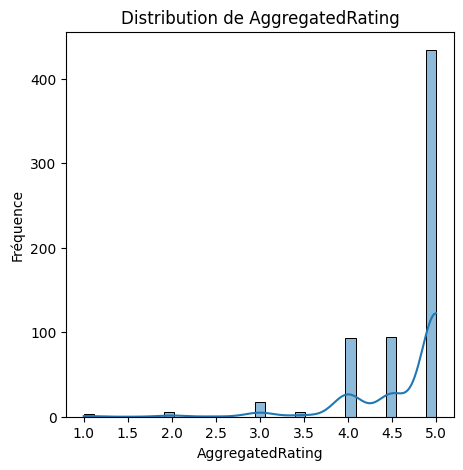

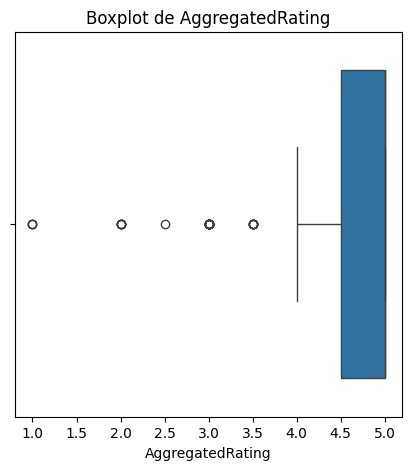

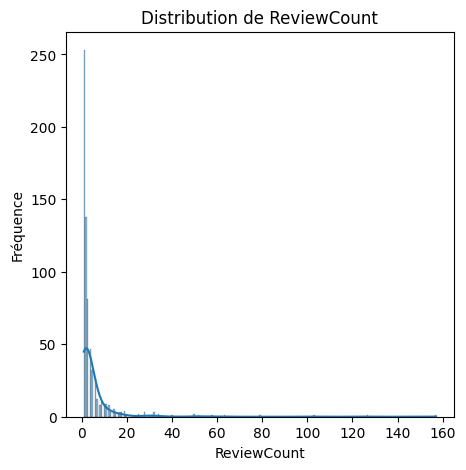

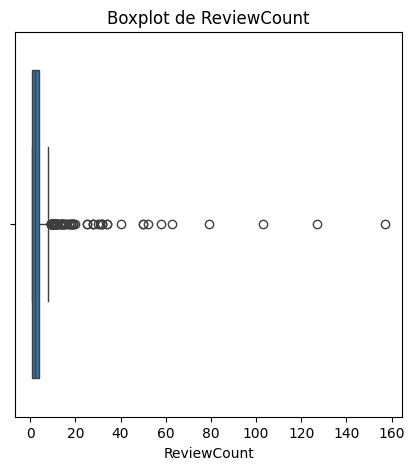

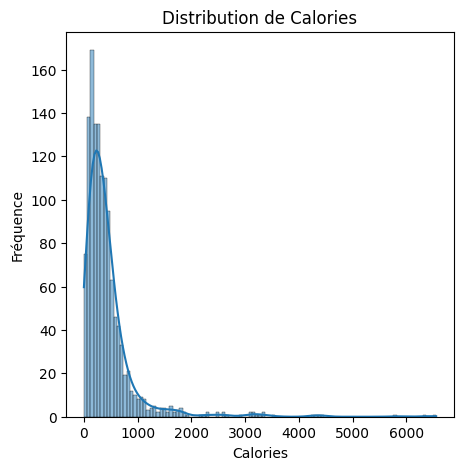

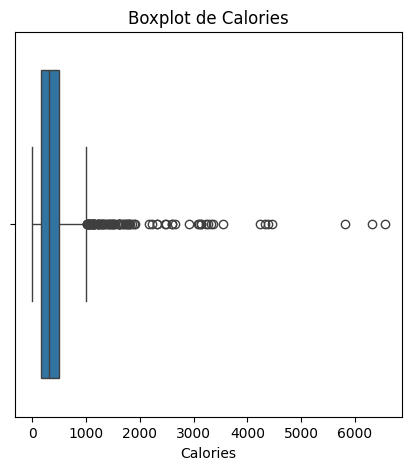

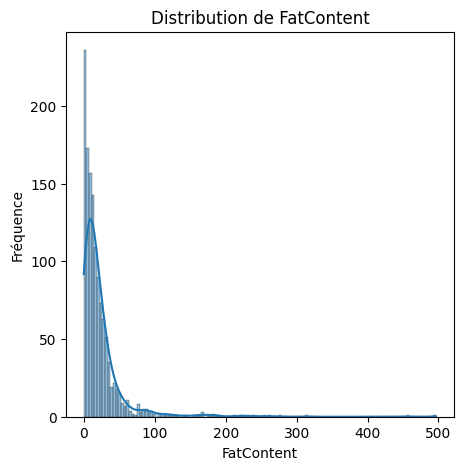

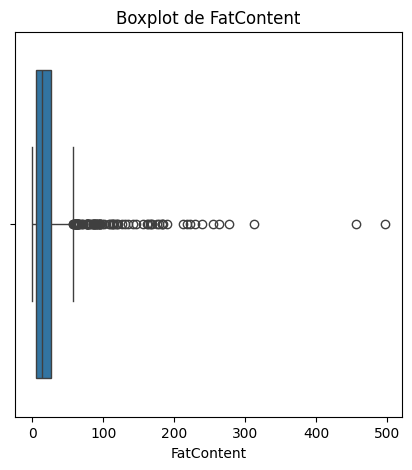

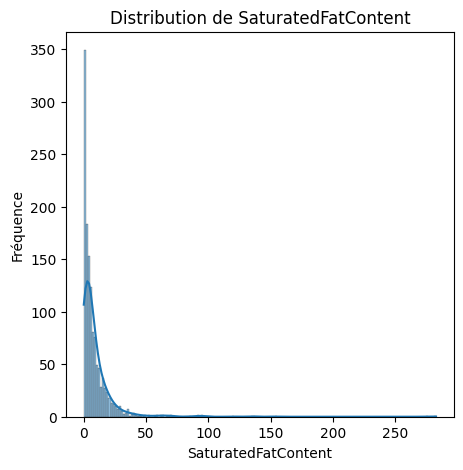

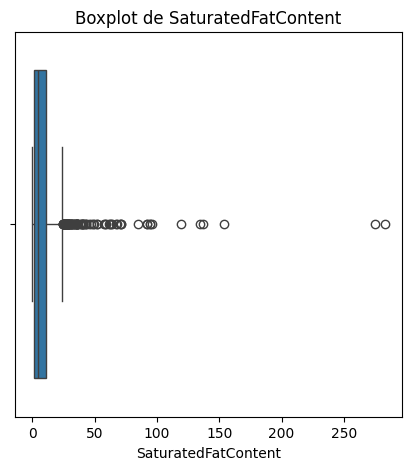

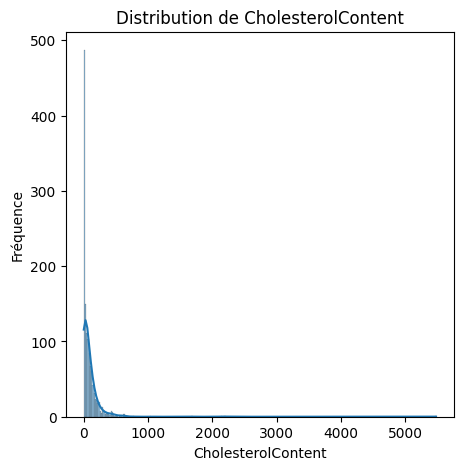

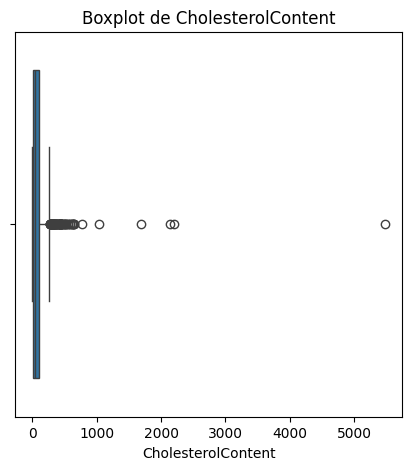

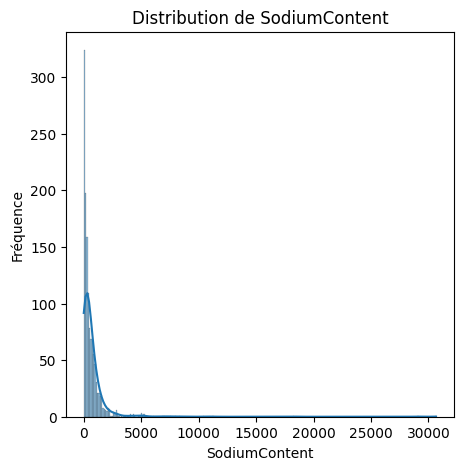

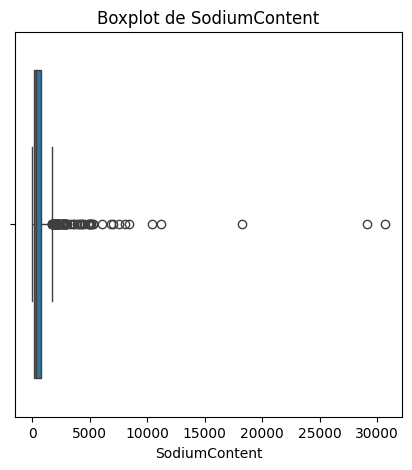

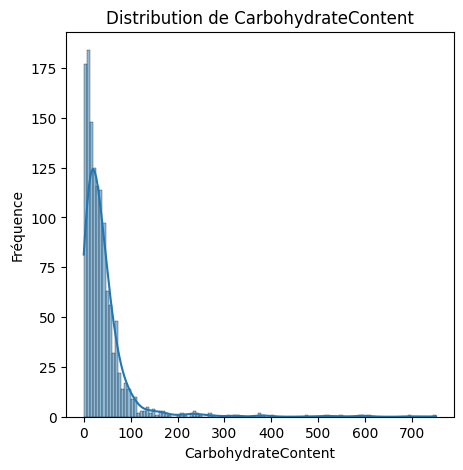

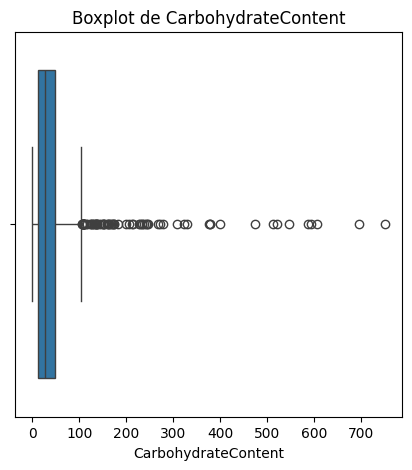

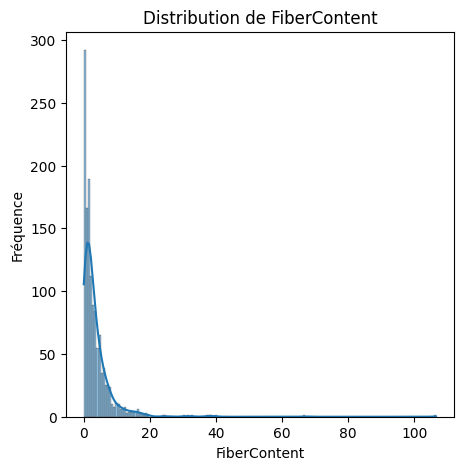

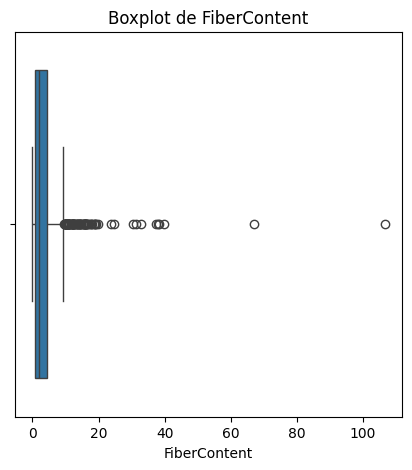

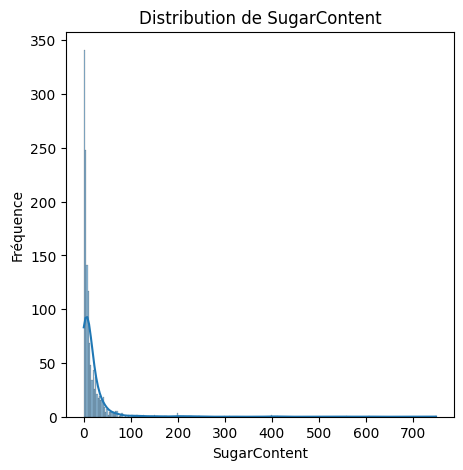

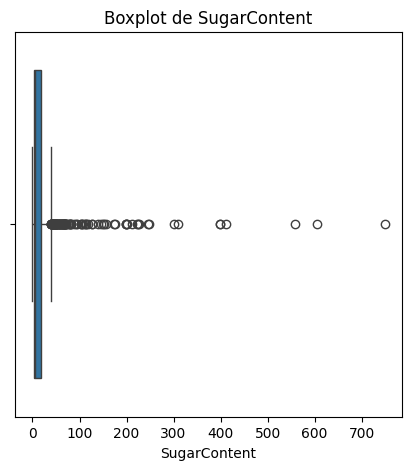

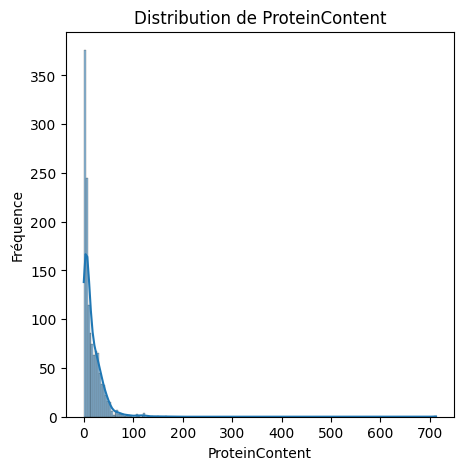

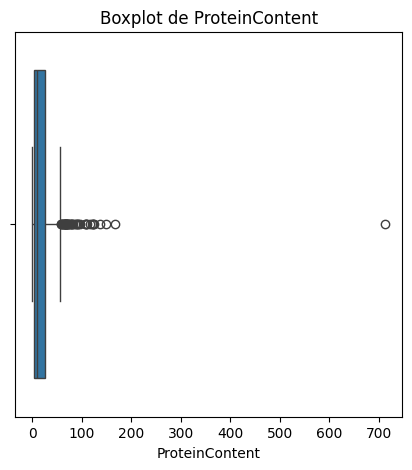

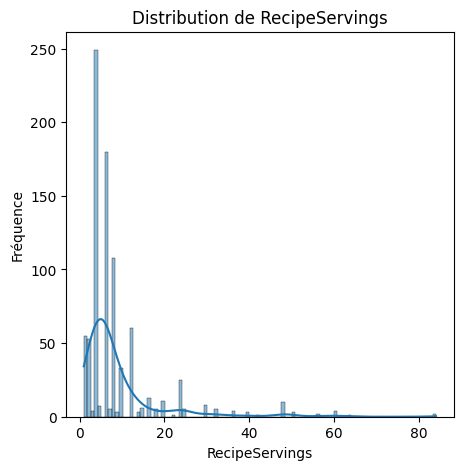

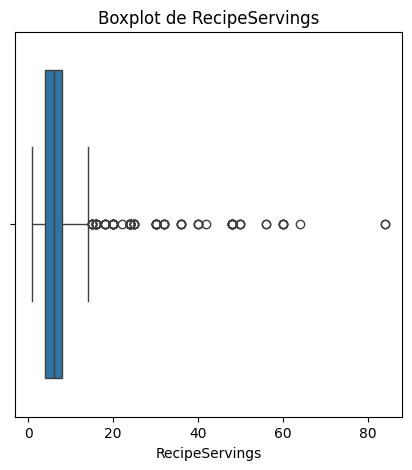

In [118]:
numeric_cols = [
    "AggregatedRating", "ReviewCount", "Calories", "FatContent",
    "SaturatedFatContent", "CholesterolContent", "SodiumContent",
    "CarbohydrateContent", "FiberContent", "SugarContent", "ProteinContent",
    "RecipeServings"
]
for col in numeric_cols:
    plt.figure(figsize=(5,5))
    sns.histplot(df_recipes_small[col], kde=True)
    plt.title(f"Distribution de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.show()
    plt.figure(figsize=(5,5))
    sns.boxplot(x=df_recipes_small[col])
    plt.title(f"Boxplot de {col}")
    plt.show()

 #### **ii.reviews :** 

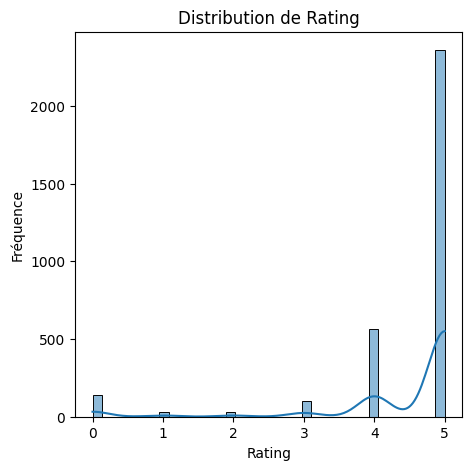

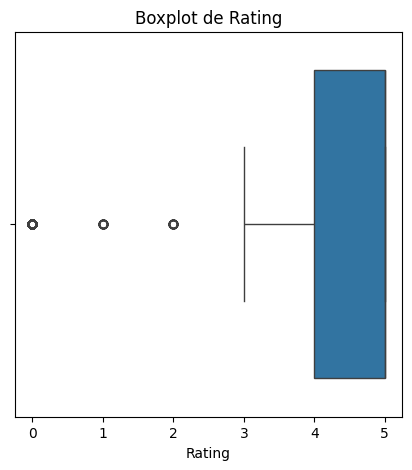

In [119]:
plt.figure(figsize=(5,5))
sns.histplot(df_reviews_small["Rating"], kde=True)
plt.title(f"Distribution de Rating")
plt.xlabel("Rating")
plt.ylabel("Fréquence")
plt.show()
plt.figure(figsize=(5,5))
sns.boxplot(x=df_reviews_small["Rating"])
plt.title(f"Boxplot de Rating")
plt.show()

 ## Interpretation de la description et de la distrubtion ( Quelques informations a retenir sur les données ) :

#### - Recipes

* Notes globalement élevées : moyenne ≈ 4,67/5.

* Popularité très inégale : ReviewCount de 1 à 157 avis.

* Nutrition variable avec des valeurs extrêmes : calories 0–6553 kcal, protéines 0–712 g, matières grasses 0–496 g.

* Portions : 1–84, médiane 6.



#### - Reviews

* Notes majoritairement élevées : moyenne ≈ 4,67/5.

* Variabilité faible : la majorité des avis sont 4 ou 5.

* Certaines recettes ont peu d’avis, ce qui peut influencer la fiabilité de la note moyenne.

→ Points clés : valeurs extrêmes à contrôler, popularité et nombre d’avis très variables.

In [120]:
zero_counts = (df_recipes_small == 0).sum()

print(zero_counts[zero_counts > 0])


Calories                 9
FatContent              33
SaturatedFatContent     68
CholesterolContent     288
SodiumContent            6
CarbohydrateContent     15
FiberContent            72
SugarContent            33
ProteinContent          23
dtype: int64


# ***Phase 3 : Data preparation***

 ### Formater les données pour une meilleur utilisation ML :

 #### a/ Nom de la recette :

In [121]:
def clean_name(name):
    if pd.isna(name):
        return None
    name = name.lower()
    name = re.sub(r"[^a-z\s]", "", name)
    name = re.sub(r"\s+", " ", name)
    name = name.strip()
    return name
df_recipes_small['Name'] = df_recipes_small['Name'].apply(clean_name)


 #### b/ Prep-time / Cook-time / Total-time de la recette :

In [122]:
def convert_to_minutes(time_str):
    if pd.isna(time_str):
        return None
    time_str = str(time_str).lower().strip()
    if time_str.startswith('pt'):
        hours = re.search(r'(\d+)h', time_str)
        minutes = re.search(r'(\d+)m', time_str)
        total_minutes = 0
        if hours:
            total_minutes += int(hours.group(1)) * 60
        if minutes:
            total_minutes += int(minutes.group(1))
        return total_minutes if total_minutes > 0 else None
    hours = re.search(r'(\d+)\s*h', time_str)
    minutes = re.search(r'(\d+)\s*m', time_str)
    total_minutes = 0
    if hours:
        total_minutes += int(hours.group(1)) * 60
    if minutes:
        total_minutes += int(minutes.group(1))
    if total_minutes == 0 and time_str.isdigit():
        return int(time_str)
    return total_minutes if total_minutes > 0 else None


for col in ['CookTime', 'PrepTime', 'TotalTime']:
    df_recipes_small[col] = df_recipes_small[col].apply(convert_to_minutes)


 #### c/ FatContent / SaturatedFatContent / CholesterolContent / SodiumContent / CarbohydrateContent / FiberContent / SugarContent / ProteinContent : 
 (Les valeurs manquantes sont remplacées par la moyenne et on a utilisé le StandardScaler pour la standarisation de leurs valeurs)

In [123]:
nutrition_cols = [
    'FatContent', 'SaturatedFatContent', 'CholesterolContent', 
    'SodiumContent', 'CarbohydrateContent', 'FiberContent', 
    'SugarContent', 'ProteinContent', 'Calories'
]
for col in nutrition_cols:
    mean_val = df_recipes_small[col].mean()
    df_recipes_small[col] = df_recipes_small[col].fillna(mean_val)
scaler = MinMaxScaler()

* Justification de choix : 

    Pourquoi MinMaxScaler ? 
    - met toutes les colonnes numériques sur une échelle commune [0,1], ce qui conserve les proportions relatives des nutriments et évite que les variables avec de grandes valeurs (ex : Sodium, Calories) dominent les algorithmes ML.

    Pourquoi Imputation par la moyenne ? 
    - remplace les valeurs manquantes par la moyenne de la colonne pour conserver la distribution globale et éviter de biaiser les données, tout en gardant la cohérence des quantités nutritionnelles.

 #### d/ Description :

In [124]:
def clean_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r"[^a-z0-9\s]", "", text)
    text = re.sub(r"\s+", " ", text)
    text = text.strip()
    return text
df_recipes_small['Description'] = df_recipes_small['Description'].apply(clean_text)

 #### d/ RecipeInstructions :

In [125]:
def clean_instructions(instr):
    if pd.isna(instr):
        return ""
    
    instr = str(instr)
    steps = re.findall(r'"(.*?)"', instr)
    text = " ".join(steps) if steps else instr
    text = text.lower()                       
    text = re.sub(r"[^a-z0-9\s]", "", text)  
    text = re.sub(r"\s+", " ", text)         
    text = text.strip()                       
    return text
df_recipes_small['RecipeInstructions'] = df_recipes_small['RecipeInstructions'].apply(clean_instructions)


 #### e/ RecipeCategory :

Nombre de Categories uniques :

In [126]:

print("Nombre de catégories uniques :", df_recipes_small['RecipeCategory'].nunique())

Nombre de catégories uniques : 138


Remarque : 
- Le nombre de categories uniques est trés élevé (138) ce qui empeche de procéder directement a un encodage car ca risque de creer beaucoup de colonnes qui sont nulles et inutiles.
On va donc essayer de faire un traitement spécifique :

ETAPE 1 : Ces catégories sont trés spécifiques, donc on va les mettre tout a 'None' puis ensuite les remplacer par une categorie qu'on va créer qui est 'Other'

In [127]:

non_food_tags = [
    'bath/beauty', '< 15 mins', '< 30 mins', '< 60 mins', '< 4 hours',
    'easy', 'beginner cook', 'kid friendly', 'inexpensive', 'from scratch',
    'high protein', 'low protein', 'low cholesterol', 'very low carbs',
    'high in...'
]
df_recipes_small['RecipeCategory'] = df_recipes_small['RecipeCategory'].str.lower()
df_recipes_small['RecipeCategory'] = df_recipes_small['RecipeCategory'].apply(
    lambda x: None if x in non_food_tags else x
)


ETAPE 2 : Regroupement des catégories rares (Si une catégorie a moins de 5 recettes, on la remplace par 'other' pour réduire la dimensionnalité avant encodage)

In [128]:
category_counts = df_recipes_small['RecipeCategory'].value_counts()
rare_categories = category_counts[category_counts < 5].index.tolist()
print ("Catégories rares :", rare_categories)
df_recipes_small['RecipeCategory'] = df_recipes_small['RecipeCategory'].apply(
    lambda x: 'other' if x in rare_categories else x
)

Catégories rares : ['lentil', 'yam/sweet potato', 'chicken thigh & leg', 'lobster', 'fruit', 'corn', 'weeknight', 'healthy', 'gumbo', 'whole chicken', 'shakes', 'black beans', 'lemon', 'vegan', 'nuts', 'greens', 'long grain rice', 'spaghetti', 'pineapple', 'meatballs', 'white rice', 'native american', 'veal', 'soy/tofu', 'scones', 'cuban', 'tropical fruits', 'canadian', 'for large groups', 'peppers', 'stocks', 'halloween', 'potluck', 'chinese', 'turkey breasts', 'curries', 'australian', 'egg free', 'manicotti', 'microwave', 'southwestern u.s.', 'penne', 'kosher', 'turkish', 'mashed potatoes', 'thai', 'tex mex', 'moose', 'halibut', 'tuna', 'stir fry', 'lactose free', 'mussels', 'greek', 'filipino', 'tilapia', 'cherries', 'spring', 'christmas', 'swiss', 'toddler friendly', 'cauliflower', 'brunch', 'jellies', 'meatloaf', 'pakistani', 'moroccan', 'spicy', 'chocolate chip cookies', 'brown rice', 'scandinavian', 'chard', 'crawfish', 'collard greens', 'melons', 'beef organ meats']


ETAPE 3 : Gestion des valeurs manquantes (Les valeurs manquantes (None) ou supprimées à l’étape 1 → remplacer par 'other')

In [129]:
df_recipes_small['RecipeCategory'] = df_recipes_small['RecipeCategory'].fillna('other')
print("Nombre de catégories uniques après nettoyage :", df_recipes_small['RecipeCategory'].nunique())

Nombre de catégories uniques après nettoyage : 48


ETAPE 4 : OneHot Encodage

In [130]:
df_recipes_small = pd.get_dummies(
    df_recipes_small, 
    columns=['RecipeCategory'], 
    prefix='Category'            
)

Justification de choix : 


On a utilisé OneHotEncoder parce que :

 * Les catégories n’ont aucun ordre implicite, donc un encodage numérique simple (LabelEncoder) pourrait induire une relation fictive.

 * OneHot transforme chaque catégorie en colonne binaire, ce qui est idéal pour les algos ML sensibles à l’ordre (régression, NN, SVM).

 #### e/ RecipeIngredientParts et RecipeIngredientQuantities :

ETAPE 1 : nettoyage

In [131]:
def parse_ingredients(parts_str, quantities_str):
    if pd.isna(parts_str) or pd.isna(quantities_str):
        return [], []
    
    parts_str = str(parts_str)
    quantities_str = str(quantities_str)
    
    parts = re.findall(r'"(.*?)"', parts_str)
    quantities = re.findall(r'"(.*?)"', quantities_str)
    
    if not parts:
        parts = [p.strip() for p in parts_str.split(',') if p.strip()]
    if not quantities:
        quantities = [q.strip() for q in quantities_str.split(',') if q.strip()]
    
    if len(quantities) != len(parts):
        quantities = [1]*len(parts)
    
    quantities_float = []
    for q in quantities:
        try:
            quantities_float.append(float(q))
        except (ValueError, TypeError):
            m = re.findall(r'[\d.]+', str(q))
            quantities_float.append(float(m[0]) if m else 1)
    
    return parts, quantities_float


ETAPE 2 : encodage avec Multi-hot encoding

In [132]:
df_recipes_small['IngredientList'], df_recipes_small['IngredientQtyList'] = zip(*df_recipes_small.apply(
    lambda row: parse_ingredients(row['RecipeIngredientParts'], row['RecipeIngredientQuantities']),
    axis=1
))
all_ingredients = sorted(set(chain.from_iterable(df_recipes_small['IngredientList'])))
print(f"Nombre total d'ingrédients uniques : {len(all_ingredients)}")
ingredient_matrix = np.zeros((len(df_recipes_small), len(all_ingredients)))
for i, (parts, qtys) in enumerate(zip(df_recipes_small['IngredientList'], df_recipes_small['IngredientQtyList'])):
    for part, qty in zip(parts, qtys):
        idx = all_ingredients.index(part)
        ingredient_matrix[i, idx] = qty

df_ingredients_encoded = pd.DataFrame(ingredient_matrix, columns=all_ingredients)
scaler = MinMaxScaler()
df_ingredients_encoded_scaled = pd.DataFrame(scaler.fit_transform(df_ingredients_encoded), columns=all_ingredients)
df_ingredients_encoded_scaled.head()
df_recipes_small_reset = df_recipes_small.reset_index(drop=True)
df_ingredients_encoded_scaled_reset = df_ingredients_encoded_scaled.reset_index(drop=True)
df_recipes_small_final = pd.concat([df_recipes_small_reset, df_ingredients_encoded_scaled_reset], axis=1)
cols_to_drop = ['RecipeIngredientParts', 'RecipeIngredientQuantities', 'IngredientList', 'IngredientQtyList']
df_recipes_small_final.drop(columns=cols_to_drop, inplace=True)


Nombre total d'ingrédients uniques : 1424


 #### f/ AggregatedRating :

In [133]:
mean_rating = df_recipes_small_final['AggregatedRating'].mean()
df_recipes_small_final['AggregatedRating'] = df_recipes_small_final['AggregatedRating'].fillna(mean_rating)
scaler = MinMaxScaler()
df_recipes_small_final['AggregatedRating'] = scaler.fit_transform(
    df_recipes_small_final[['AggregatedRating']]
)

 #### g/ Keywords :

ETAPE 1 : Nettoyage

In [134]:
def clean_keywords(kw_str):
    if pd.isna(kw_str) or not isinstance(kw_str, str):
        return []
    kw_str = kw_str.replace('c(', '').replace(')', '').replace('"', '')
    keywords = [k.strip() for k in kw_str.split(',') if k.strip()]
    keywords = [k for k in keywords if not re.search(r'\b(mins?|hours?)\b', k, re.IGNORECASE)]
    keywords = [re.sub(r'\.{2,}', '', k).strip() for k in keywords]
    keywords = [k for k in keywords if k]
    return keywords
df_recipes_small_final['CleanedKeywords'] = df_recipes_small_final['Keywords'].apply(clean_keywords)
df_recipes_small_final.drop(columns=['Keywords'], inplace=True)

ETAPE 2 : Encodage

In [135]:

mlb = MultiLabelBinarizer()
keywords_encoded = mlb.fit_transform(df_recipes_small_final['CleanedKeywords'])
df_keywords_encoded = pd.DataFrame(
    keywords_encoded,
    columns=mlb.classes_,
    index=df_recipes_small_final.index
)
df_recipes_small_final = pd.concat([df_recipes_small_final, df_keywords_encoded], axis=1)
df_recipes_small_final.drop(columns=['CleanedKeywords'], inplace=True, errors='ignore')

 #### h/ rating de Reviews :

In [136]:
df_reviews_small = df_reviews_small.copy()
mean_rating = df_reviews_small['Rating'].mean()
df_reviews_small['Rating'] = df_reviews_small['Rating'].fillna(mean_rating)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_reviews_small['Rating_scaled'] = scaler.fit_transform(df_reviews_small[['Rating']])
df_reviews_small['Rating'] = df_reviews_small['Rating_scaled']
df_reviews_small.drop(columns=['Rating_scaled'], inplace=True)

# FUSIONNER LES 2 DATAFRAMES REVIEWS ET RECIPES SUR LA CLE ETRANGERE RecipeId :

In [137]:
df_finale = pd.merge(
    df_reviews_small,
    df_recipes_small_final,     
    on='RecipeId',        
    how='inner'          
)

In [138]:
total_ids = df_finale['RecipeId'].shape[0]
unique_ids = df_finale['RecipeId'].nunique()

print(f"Total RecipeIds (rows): {total_ids}")
print(f"Unique RecipeIds: {unique_ids}")
print(f"Number of duplicates: {total_ids - unique_ids}")


Total RecipeIds (rows): 3231
Unique RecipeIds: 664
Number of duplicates: 2567


In [139]:
df_finale.describe()

,ReviewId,RecipeId,Rating,CookTime,PrepTime,TotalTime,AggregatedRating,ReviewCount,Calories,FatContent,...,Venezuelan,Very Low Carbs,Vietnamese,Weeknight,Welsh,White Rice,Whole Chicken,Wild Game,Winter,Yam/Sweet Potato
count,3.231000e+03,3231.000000,3231.000000,2833.000000,3166.000000,3212.000000,3231.000000,3231.000000,3231.000000,3231.000000,...,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.0,3231.000000,3231.000000,3231.000000
mean,8.019122e+05,156654.914578,0.895265,48.227674,18.685092,60.988792,0.958118,29.955432,361.625534,18.395388,...,0.004952,0.092851,0.046116,0.112349,0.002476,0.000619,0.0,0.000619,0.022594,0.000619
std,5.134895e+05,131844.665074,0.232577,160.316248,41.981509,157.375318,0.092838,41.630126,484.501004,30.211115,...,0.070207,0.290268,0.209768,0.315844,0.049706,0.024876,0.0,0.024876,0.148627,0.024876
min,4.970000e+02,93.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,3.879235e+05,35787.500000,0.800000,15.000000,10.000000,20.000000,1.000000,4.000000,163.300000,6.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,7.539310e+05,115372.000000,1.000000,25.000000,15.000000,40.000000,1.000000,11.000000,257.400000,10.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,1.187860e+06,237573.000000,1.000000,45.000000,20.000000,60.000000,1.000000,34.000000,395.700000,21.150000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,2.089559e+06,538740.000000,1.000000,7200.000000,1440.000000,7215.000000,1.000000,157.000000,6553.300000,496.600000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


# TABLEAU COMPARATIF : LA STRUCTURE DE DONNEES AVANT ET APRES PREPARATION

| Colonne                                                                                                                                             | Valeurs originales                                               | Valeurs après traitement                                           | Type de transformation            | Objectif pour ML                                         |
| --------------------------------------------------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------- | ------------------------------------------------------------------ | --------------------------------- | -------------------------------------------------------- |
| `Name`                                                                                                                                              | Texte libre, majuscules/minuscules, espaces, caractères spéciaux | Minuscules, sans ponctuation ni espaces superflus                  | Nettoyage texte                   | Standardiser pour NLP / features textuelles              |
| `CookTime`, `PrepTime`, `TotalTime`                                                                                                                 | Strings type `"PT1H20M"`, `"45M"`, `"2H"`                        | Nombres entiers → minutes (ex: 80, 45, 120)                        | Parsing / Feature engineering     | Variables numériques continues exploitables              |
| `FatContent`, `SaturatedFatContent`, `CholesterolContent`, `SodiumContent`, `CarbohydrateContent`, `FiberContent`, `SugarContent`, `ProteinContent` | Strings avec unités (`"10g"`, `"5 mg"`), NaN possibles           | Float normalisé entre 0 et 1                                       | Imputation moyenne + MinMaxScaler | Uniformiser échelle pour ML                              |
| `Description`                                                                                                                                       | Texte long, ponctuation, majuscules/minuscules                   | Texte nettoyé, minuscules, ponctuation supprimée                   | Nettoyage texte                   | Préparation pour NLP ou features textuelles              |
| `RecipeCategory`                                                                                                                                    | Strings multiples, ponctuation, références temps                 | OneHotEncoding (colonnes binaires par catégorie)                   | Encodage catégoriel               | Transformer catégories textuelles en features numériques |
| `Keywords` → `CleanedKeywords`                                                                                                                      | Strings multiples, ponctuation, `< 60 Mins`                      | Listes propres, sans ponctuation ni temps → OneHotEncoding         | Nettoyage + encodage multi-label  | Transformer mots-clés en features binaires exploitables  |
| `RecipeIngredientParts` & `RecipeIngredientQuantities`                                                                                              | Strings avec guillemets, nombres, NaN                            | Listes Python de strings et floats → OneHotEncoding + MinMaxScaler | Parsing + feature engineering     | Représentation numérique des ingrédients et quantités    |
| `AggregatedRating`                                                                                                                                  | Float avec NaN, valeurs répétitives (0 à 1)                      | Float normalisé entre 0 et 1, NaN remplacés par moyenne            | Imputation + scaling              | Normalisation des notes pour ML                          |
| `Review`                                                                                                                                            | Texte libre, majuscules/minuscules, ponctuation                  | Texte nettoyé, minuscules, ponctuation supprimée                   | Nettoyage texte                   | Préparation NLP ou features textuelles                   |
| `Rating`                                                                                                                                            | Entiers 1–5, NaN possibles                                       | `Rating_scaled` float entre 0 et 1, original supprimé              | Imputation + MinMaxScaler         | Valeur normalisée pour ML                                |
| `RecipeId`                                                                                                                                          | Identifiant unique recette                                       | Inchangé                                                           | Clé étrangère                     | Permet la fusion avec `reviews` et association 1:1       |


### ***BO 2 : Popularité des recettes***

**Notions à appliquer :**  Règles d’association

**Définition de popularité :** la colonne ReviewCount est un indicateur directe de la popularité, un utilisateur donne son avis pour une recette qu'il a essayé


Nous allons créer un dataframe distinct (pop_df) pour analyser la corrélation entre le nombre d'avis (ReviewCount) et les autres valeurs.

Mais avant tout, nous devons analyser précisément la répartition de cette colone.

In [140]:
pop_df = df_recipes_small_final.copy()
print("Colonnes :")
print(pop_df.columns.to_list())
print("\nstatistiques de ReviewCount :")
print(pop_df['ReviewCount'].describe())

Colonnes :
['RecipeId', 'Name', 'CookTime', 'PrepTime', 'TotalTime', 'Description', 'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent', 'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent', 'RecipeServings', 'RecipeInstructions', 'Category_apple', 'Category_asian', 'Category_bar cookie', 'Category_beans', 'Category_beverages', 'Category_breads', 'Category_breakfast', 'Category_candy', 'Category_cheese', 'Category_cheesecake', 'Category_chicken', 'Category_chicken breast', 'Category_chowders', 'Category_clear soup', 'Category_crab', 'Category_dessert', 'Category_drop cookies', 'Category_european', 'Category_free of...', 'Category_frozen desserts', 'Category_gelatin', 'Category_grains', 'Category_ham', 'Category_lamb/sheep', 'Category_lunch/snacks', 'Category_meat', 'Category_mexican', 'Category_one dish meal', 'Category_onions', 'Category_other', 'Category_pie', 'Category_pork', 'Category_potato', 

Nous remarquons que la plupart des recettes ont très peu d'avis
- le troisième quartile Q3 a une valeur 4, ce qui signifie que plus de 75% des recettes ont 4 avis ou moins.
D'ou, on peut analyser que sont les categories et valeurs nutritionelles communes entre la minorite populaire 

Separation des colones de nutrition et de temps de preparation

In [141]:
nutrition_cols = [
    'Calories','FatContent','SaturatedFatContent','CholesterolContent','SodiumContent',
    'CarbohydrateContent','FiberContent','SugarContent','ProteinContent'
]

temps_cols = ['PrepTime', 'CookTime', 'TotalTime']

Correlation des valeurs nutritionelles avec ReviewCount 
Calories: correlation = -0.061, p-value = 0.1130
FatContent: correlation = -0.053, p-value = 0.1683
SaturatedFatContent: correlation = -0.043, p-value = 0.2618
CholesterolContent: correlation = -0.030, p-value = 0.4360
SodiumContent: correlation = -0.026, p-value = 0.5050
CarbohydrateContent: correlation = -0.052, p-value = 0.1784
FiberContent: correlation = -0.056, p-value = 0.1472
SugarContent: correlation = -0.041, p-value = 0.2901
ProteinContent: correlation = -0.031, p-value = 0.4269


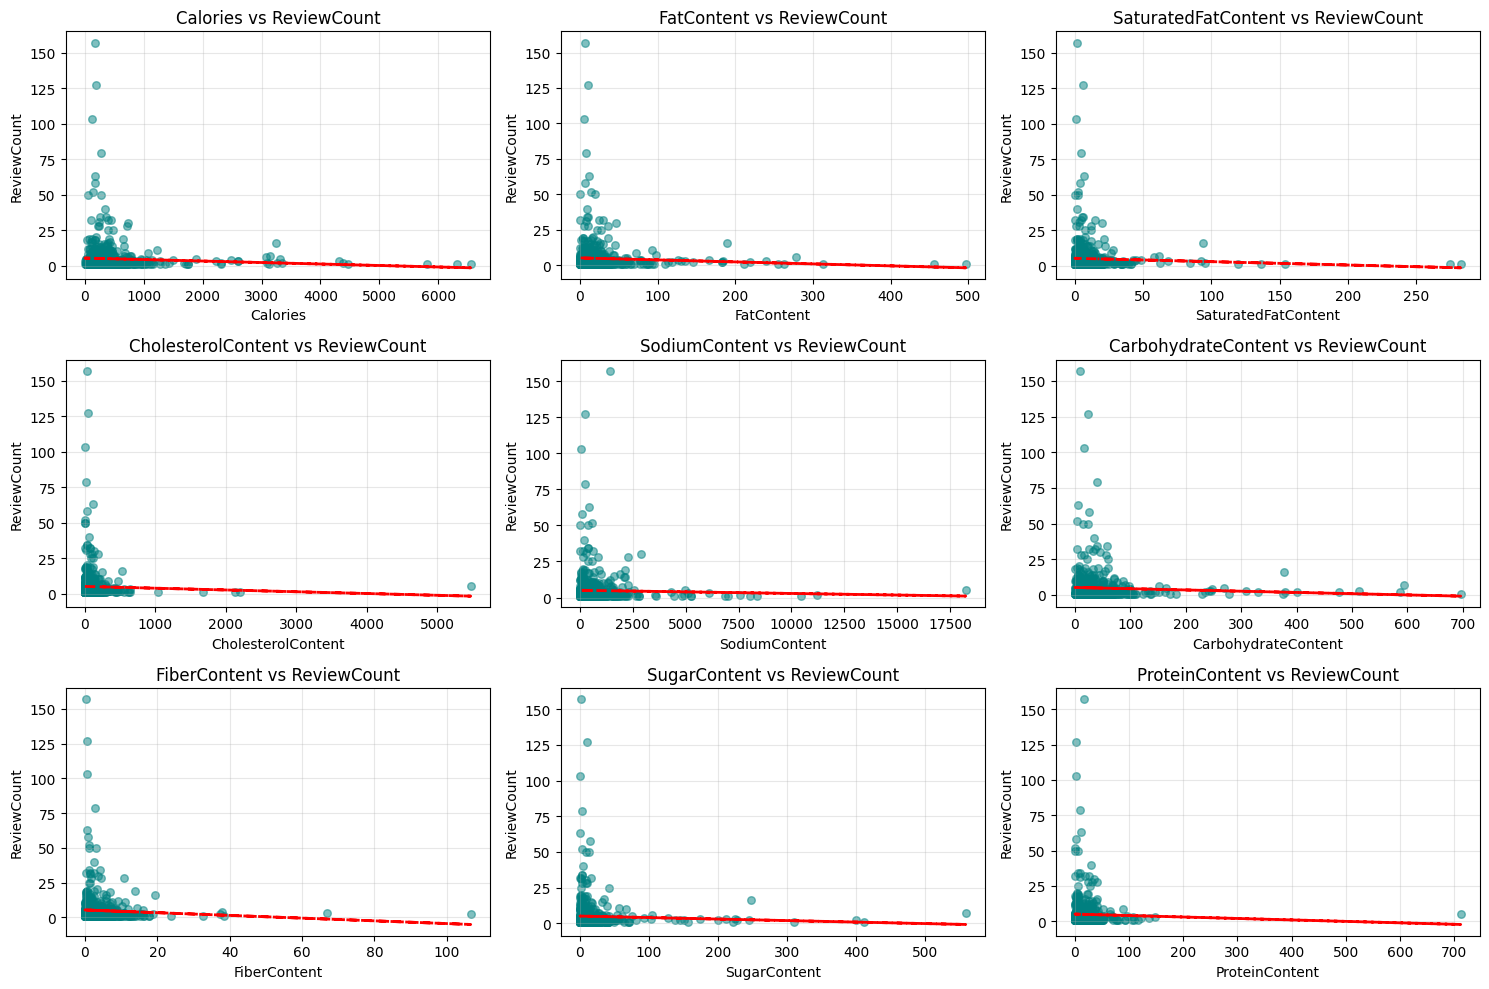

In [142]:
nutrition_data = pop_df[nutrition_cols + ['ReviewCount']].dropna()

print("Correlation des valeurs nutritionelles avec ReviewCount ")
correlations_nutrition = {}
for col in nutrition_cols:
    corr, pval = pearsonr(nutrition_data[col], nutrition_data['ReviewCount'])
    correlations_nutrition[col] = {'pearson': corr, 'p_value': pval}
    print(f"{col}: correlation = {corr:.3f}, p-value = {pval:.4f}")

ncols = 3
nrows = int(np.ceil(len(nutrition_cols) / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(nutrition_cols):
    axes[idx].scatter(nutrition_data[col], nutrition_data['ReviewCount'], alpha=0.5, s=30, color='teal')
    z = np.polyfit(nutrition_data[col], nutrition_data['ReviewCount'], 1)
    p = np.poly1d(z)
    axes[idx].plot(nutrition_data[col], p(nutrition_data[col]), "r--", linewidth=2)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('ReviewCount')
    axes[idx].set_title(f'{col} vs ReviewCount')
    axes[idx].grid(alpha=0.3)

for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Correlation des temps de preparation et cuisson avec ReviewCount 
PrepTime: correlation = -0.032, p-value = 0.4458
CookTime: correlation = -0.027, p-value = 0.5150
TotalTime: correlation = -0.034, p-value = 0.4240


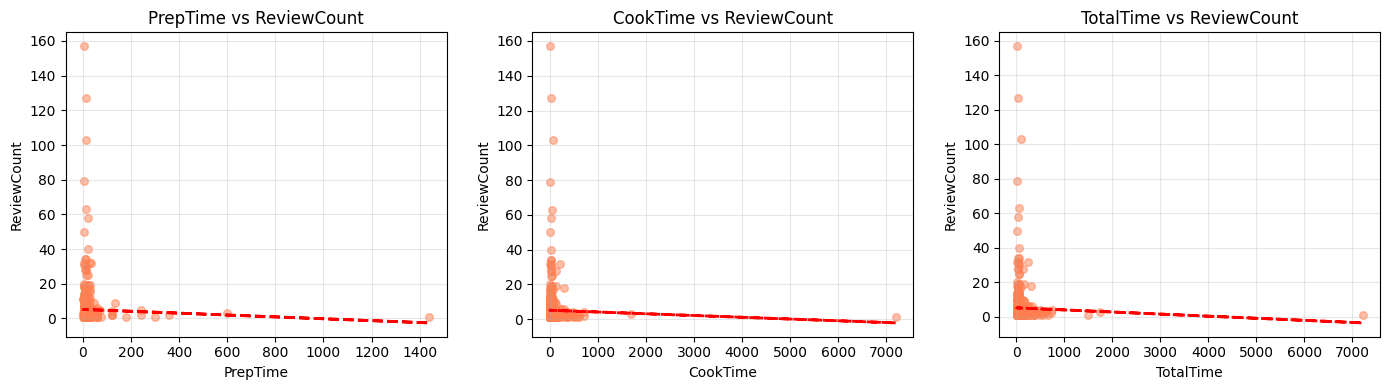

In [143]:
temps_data = pop_df[temps_cols + ['ReviewCount']].dropna()

print("Correlation des temps de preparation et cuisson avec ReviewCount ")
correlations_time = {}
for col in temps_cols:
    corr, pval = pearsonr(temps_data[col], temps_data['ReviewCount'])
    correlations_time[col] = {'pearson': corr, 'p_value': pval}
    print(f"{col}: correlation = {corr:.3f}, p-value = {pval:.4f}")

fig, axes = plt.subplots(1, 3, figsize=(14, 4))
for idx, col in enumerate(temps_cols):
    axes[idx].scatter(temps_data[col], temps_data['ReviewCount'], alpha=0.5, s=30, color='coral')
    z = np.polyfit(temps_data[col], temps_data['ReviewCount'], 1)
    p = np.poly1d(z)
    axes[idx].plot(temps_data[col], p(temps_data[col]), "r--", linewidth=2)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('ReviewCount')
    axes[idx].set_title(f'{col} vs ReviewCount')
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

Correlation entre AggregatedRating et ReviewCount
Pearson r = 0.116, p-value = 0.0024


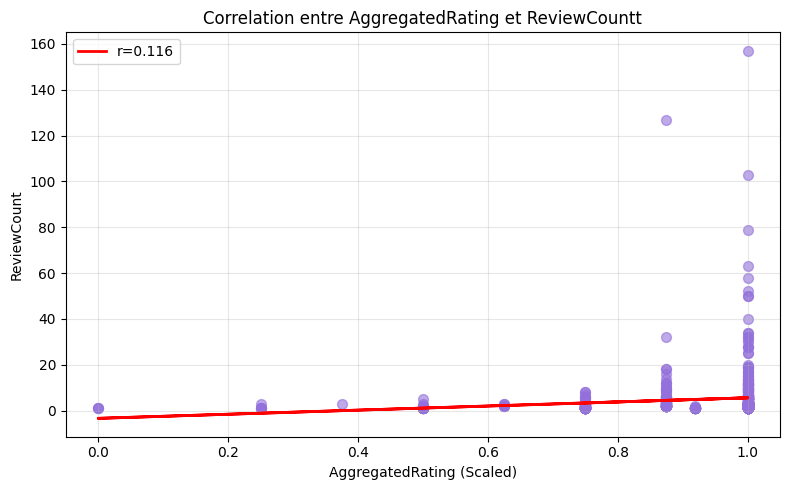

In [144]:
rating_data = pop_df[['AggregatedRating', 'ReviewCount']].dropna()

corr_rating, pval_rating = pearsonr(rating_data['AggregatedRating'], 
                                     rating_data['ReviewCount'])

print(f"Correlation entre AggregatedRating et ReviewCount")
print(f"Pearson r = {corr_rating:.3f}, p-value = {pval_rating:.4f}")

fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(rating_data['AggregatedRating'], rating_data['ReviewCount'], 
          alpha=0.6, s=50, color='mediumpurple')
z = np.polyfit(rating_data['AggregatedRating'], rating_data['ReviewCount'], 1)
p = np.poly1d(z)
ax.plot(rating_data['AggregatedRating'], p(rating_data['AggregatedRating']), 
       "r-", linewidth=2, label=f'r={corr_rating:.3f}')
ax.set_xlabel('AggregatedRating (Scaled)')
ax.set_ylabel('ReviewCount')
ax.set_title("Correlation entre AggregatedRating et ReviewCountt")
ax.legend()
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

évidemment, les recettes de haute qualité seront naturellement populaires et partagées entre les utilisateurs

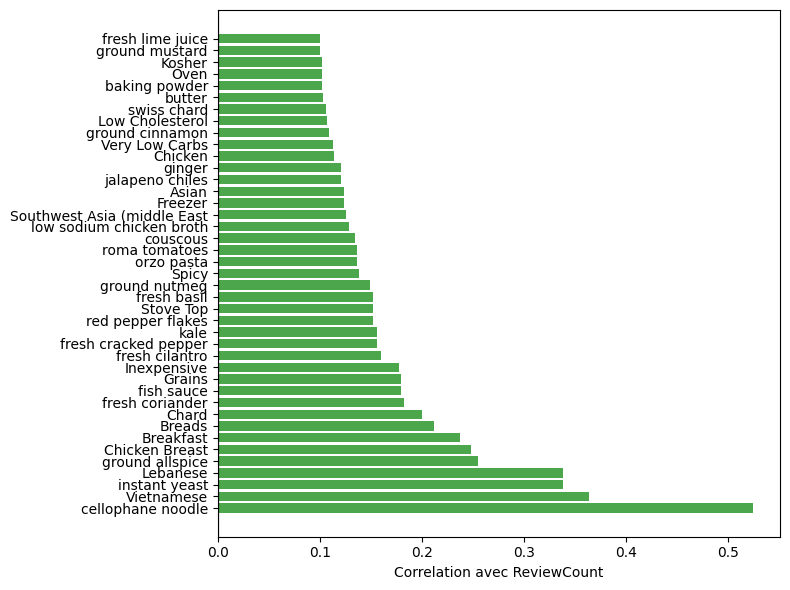

In [145]:
numeric_features = [col for col in pop_df.select_dtypes(include=np.number).columns if col not in nutrition_cols + ['RecipeId', 'CookTime', 'PrepTime', 'TotalTime', 'AggregatedRating', 'RecipeServings']]
corr_avec_reviews = pop_df[numeric_features].dropna().corr()['ReviewCount'].drop('ReviewCount')
forte_corr = corr_avec_reviews[abs(corr_avec_reviews) > 0.1].sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(8, 6))
colors = ['green' if x > 0 else 'red' for x in forte_corr.values]
ax.barh(range(len(forte_corr)), forte_corr.values, color=colors, alpha=0.7)
ax.set_yticks(range(len(forte_corr)))
ax.set_yticklabels(forte_corr.index)
ax.set_xlabel('Correlation avec ReviewCount')
ax.axvline(0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()


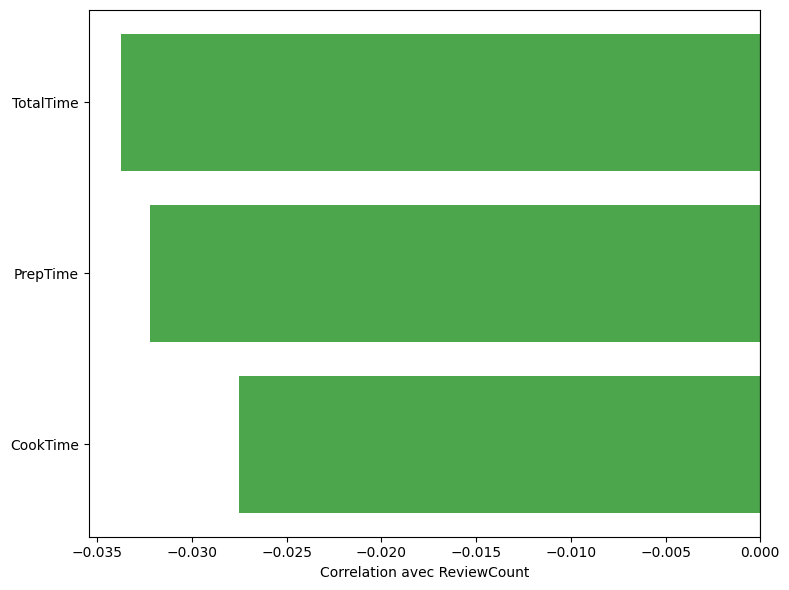

In [146]:
corr_avec_reviews = pop_df[temps_cols + ['ReviewCount']].dropna().corr()['ReviewCount'].drop('ReviewCount')
forte_corr = corr_avec_reviews[abs(corr_avec_reviews) > 0.0].sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(range(len(forte_corr)), forte_corr.values, color=colors, alpha=0.7)
ax.set_yticks(range(len(forte_corr)))
ax.set_yticklabels(forte_corr.index)
ax.set_xlabel('Correlation avec ReviewCount')
ax.axvline(0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()


Les temps de préparation et de cuisson sont fortement corrélés négativement à la popularité.

- Les utilisateurs sont plus motivés à essayer des plats plus légers, plus faciles à préparer et nécessitant peu de temps de cuisson.

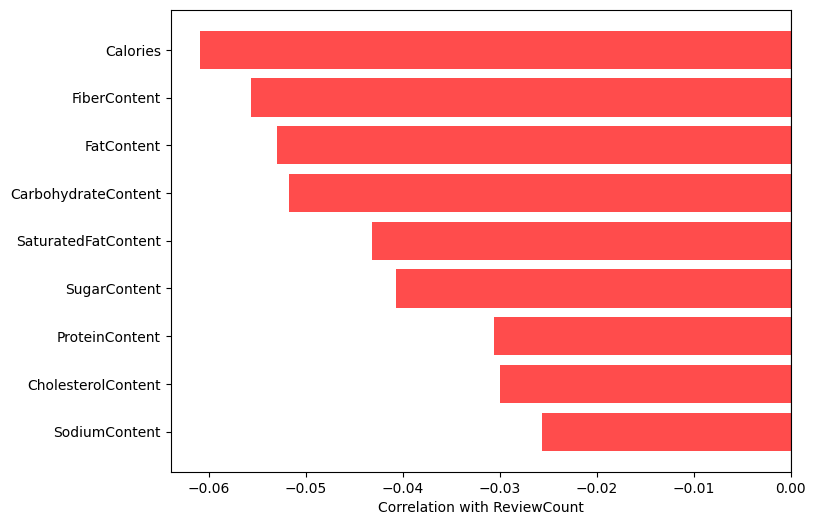

In [147]:
corr_avec_reviews2 = pop_df[nutrition_cols + ['ReviewCount']].dropna().corr()['ReviewCount'].drop('ReviewCount')
forte_corr = corr_avec_reviews2[abs(corr_avec_reviews2) > 0.0].sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(8, 6))
colors = ['green' if x > 0 else 'red' for x in forte_corr.values]
ax.barh(range(len(forte_corr)), forte_corr.values, color=colors, alpha=0.7)
ax.set_yticks(range(len(forte_corr)))
ax.set_yticklabels(forte_corr.index)
ax.set_xlabel('Correlation with ReviewCount')
ax.axvline(0, color='black', linewidth=0.8)


Toutes les valeurs nutritionnelles ont une corrélation négative avec la popularité

Notamment les repas riches en **calories**, en **fibres** ou en **gras** ont tendance à être moins essayés et évalués

On peut déduire que les recettes populaires ont tendance à être soit légères, soit "healthy". Les utilisateurs sont plus susceptibles de les essayer et de les partager avec leurs amis

## **Interprétation des Résultats et Conclusion BO2**

### **✅ Synthèse des Performances**

**📊 Analyse Corrélationnelle :**
- L'analyse de corrélation a été menée avec succès sur les caractéristiques des recettes et leur popularité
- Les métriques de corrélation (Pearson) et les p-values indiquent la force et la significativité des relations
- L'analyse révèle des patterns clairs entre les caractéristiques des recettes et leur popularité

**🔍 Facteurs de Popularité Identifiés :**

Les **corrélations négatives** indiquent les caractéristiques qui diminuent la popularité
  
Les **corrélations positives** indiquent les caractéristiques qui augmentent la popularité


---

### **🎯 Réponse au Business Objective BO2**

**Objectif atteint :** Identifier les facteurs qui influencent la popularité d'une recette

**Utilité pratique :**
1. **Optimiser les recettes** : Créer des recettes avec des caractéristiques qui favorisent la popularité
2. **Guider la création** : Conseiller les auteurs sur les features qui attirent les utilisateurs
3. **Prioriser le contenu** : Mettre en avant les recettes avec un fort potentiel de popularité
4. **Stratégie marketing** : Cibler les recettes qui correspondent aux préférences des utilisateurs

**Variables clés identifiées :**
- **Temps de préparation** : Corrélations négatives (PrepTime: -0.032, CookTime: -0.027, TotalTime: -0.034)
- **Valeurs nutritionnelles** : Toutes négativement corrélées (notament Calories: -0.061, FatContent: -0.053, FiberContent: -0.056)
- **Qualité des recettes** : Corrélation positive significative (AggregatedRating: +0.116, p-value: 0.0024)


**📈 Conclusion :**
- La popularité est principalement influencée par la simplicité et la rapidité de préparation
- Les recettes "healthy" et légères sont plus susceptibles d'être populaires
- La qualité des recettes (note moyenne) influence positivement leur popularité
  

---

### **🚀 Recommandations**

1. **Pour créer des recettes populaires** : Privilégier des recettes rapides à préparer (moins de 30 minutes)
2. **Pour optimiser le contenu** : Mettre l'accent sur des recettes légères et "healthy"
3. **Pour la plateforme** : Utiliser ces insights pour suggérer des améliorations aux auteurs
4. **Pour aller plus loin** : Analyser les ingrédients spécifiques qui favorisent la popularité

---

### **📌 Conclusion**

L'analyse de corrélation développée pour **BO2** permet de :
- ✅ Identifier les caractéristiques qui influencent la popularité des recettes
- ✅ Comprendre les préférences des utilisateurs en termes de nutrition et temps

### **✅ Synthèse des Performances**

---

### **🎯 Réponse au Business Objective BO2**

**Objectif atteint :** ✅ Anticiper la note qu'une recette pourrait obtenir

**Utilité pratique :**
1. **Prédire le succès** : Estimer la note potentielle d'une nouvelle recette avant publication
2. **Optimiser les recettes** : Identifier quels ingrédients/caractéristiques améliorer
3. **Guider la création** : Conseiller les auteurs sur les features qui plaisent aux utilisateurs
4. **Prioriser le contenu** : Mettre en avant les recettes avec un fort potentiel

**Variables clés à surveiller :**
- Les features avec les coefficients les plus élevés (en valeur absolue) sont les leviers principaux
- Les catégories, ingrédients spécifiques, et valeurs nutritionnelles jouent des rôles distincts

---

### **🚀 Recommandations**

1. **Pour améliorer les recettes existantes** : Ajuster les caractéristiques selon les coefficients identifiés
2. **Pour créer de nouvelles recettes** : S'inspirer des patterns des recettes bien notées
3. **Pour la plateforme** : Utiliser ce modèle pour suggérer des améliorations aux auteurs
4. **Pour aller plus loin** : Tester d'autres modèles (Ridge, Lasso) pour gérer la multicolinéarité

---

### **📌 Conclusion**

Le modèle de régression linéaire développé pour **BO3** permet de :
- ✅ Prédire la note d'une recette avec une erreur acceptable
- ✅ Identifier les caractéristiques les plus influentes
- ✅ Fournir des insights actionnables pour optimiser les recettes

**Mission accomplie pour BO3 !** 🎉

# ***Phase 4 : Modeling - BO3***

### **Objectif BO3 : Prédiction de la note d'une recette**

**🎯 Business Objective :** Anticiper la note qu'une recette pourrait obtenir en fonction de ses caractéristiques (ingrédients, valeurs nutritionnelles, catégorie), afin d'évaluer son potentiel de succès.

**📊 Data Science Objective :** Développer un modèle de régression linéaire capable de prédire la note (`AggregatedRating`) à partir des caractéristiques de la recette.

**🔧 Approche :**
- Modèle : Régression linéaire
- Target : `AggregatedRating` (déjà normalisé [0,1])
- Features : Nutrition, temps de préparation, catégories, ingrédients, keywords
- Évaluation : MAE, RMSE, R², Cross-validation
- Interprétation : Analyse des coefficients pour identifier les facteurs influents

### **1. Préparation des données pour la régression**

Colonnes à exclure des features : 'RecipeId', 'AggregatedRating', 'Name', 'Description', 'RecipeInstructions', 'ReviewCount'

In [160]:
exclude_cols = ['RecipeId', 'AggregatedRating', 'Name', 'Description', 'RecipeInstructions', 'ReviewCount']

feature_cols = [col for col in df_recipes_small_final.columns if col not in exclude_cols]

X = df_recipes_small_final[feature_cols].copy()
y = df_recipes_small_final['AggregatedRating'].copy()

time_cols = ['CookTime', 'PrepTime', 'TotalTime']
for col in time_cols:
    if col in X.columns:
        X[col] = X[col].fillna(X[col].median())

print(f"Dimensions du dataset de régression :")
print(f"   - Nombre d'échantillons : {X.shape[0]}")
print(f"   - Nombre de features : {X.shape[1]}")
print(f"   - Target : AggregatedRating (min={y.min():.3f}, max={y.max():.3f}, mean={y.mean():.3f})")

Dimensions du dataset de régression :
   - Nombre d'échantillons : 1306
   - Nombre de features : 1669
   - Target : AggregatedRating (min=0.000, max=1.000, mean=0.919)


### **2. Séparation Train / Test**

Separation 80% train / 20% test

In [161]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

print(f"Séparation Train/Test :")
print(f"   - Train : {X_train.shape[0]} échantillons ({X_train.shape[0]/X.shape[0]*100:.1f}%)")
print(f"   - Test  : {X_test.shape[0]} échantillons ({X_test.shape[0]/X.shape[0]*100:.1f}%)")

Séparation Train/Test :
   - Train : 1044 échantillons (79.9%)
   - Test  : 262 échantillons (20.1%)


### **3. Modèle Baseline (DummyRegressor)**

Ce modèle prédit toujours la moyenne et sert de référence minimale.

In [162]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

baseline_model = DummyRegressor(strategy='mean')
baseline_model.fit(X_train, y_train)

y_pred_baseline = baseline_model.predict(X_test)

mae_baseline = mean_absolute_error(y_test, y_pred_baseline)
rmse_baseline = np.sqrt(mean_squared_error(y_test, y_pred_baseline))
r2_baseline = r2_score(y_test, y_pred_baseline)

print("Performance du modèle Baseline (DummyRegressor) :")
print(f"   - MAE  : {mae_baseline:.4f}")
print(f"   - RMSE : {rmse_baseline:.4f}")
print(f"   - R²   : {r2_baseline:.4f}")

Performance du modèle Baseline (DummyRegressor) :
   - MAE  : 0.0462
   - RMSE : 0.0924
   - R²   : -0.0003


### **4. Modèle de Régression Linéaire**

Vérification de la qualité des données

In [164]:
print("Vérification de la qualité des données :")

numeric_cols_train = X_train.select_dtypes(include=[np.number]).columns
X_train = X_train[numeric_cols_train]
X_test = X_test[numeric_cols_train]

print(f"   - Colonnes sélectionnées : {len(numeric_cols_train)} features numériques")
print(f"   - NaN dans X_train : {X_train.isna().sum().sum()}")
print(f"   - NaN dans y_train : {y_train.isna().sum()}")
print(f"   - Valeurs infinies dans X_train : {np.isinf(X_train.values).sum()}")
print(f"   - Valeurs infinies dans y_train : {np.isinf(y_train.values).sum()}")

# Remplacer les NaN et inf par des valeurs appropriées
if X_train.isna().sum().sum() > 0 or np.isinf(X_train.values).sum() > 0:
    print("\n⚠️  Nettoyage des données necessaire...")
    X_train = X_train.fillna(0)
    X_test = X_test.fillna(0)
    X_train = X_train.replace([np.inf, -np.inf], 0)
    X_test = X_test.replace([np.inf, -np.inf], 0)
    print("✅ Données nettoyées")
else:
    print("\n✅ Données saines, prêtes pour l'entraînement")

Vérification de la qualité des données :
   - Colonnes sélectionnées : 1621 features numériques
   - NaN dans X_train : 0
   - NaN dans y_train : 0
   - Valeurs infinies dans X_train : 0
   - Valeurs infinies dans y_train : 0

✅ Données saines, prêtes pour l'entraînement


Créer et entraîner le modèle avec régularisation Ridge

Alpha contrôle la force de régularisation (plus grand = plus de contraintes)

AJUSTÉ : alpha réduit de 10.0 à 1.0 pour obtenir des coefficients plus équilibrés

In [166]:
from sklearn.linear_model import LinearRegression, Ridge

linear_model = Ridge(alpha=1.0)
linear_model.fit(X_train, y_train)

y_pred_train = np.clip(linear_model.predict(X_train), 0, 1)
y_pred_test = np.clip(linear_model.predict(X_test), 0, 1)

print("Modèle Ridge avec régularisation (alpha=1.0)")
print("Les prédictions sont contraintes entre [0, 1] (plage valide des notes normalisées)")
print(f"   - Avant contrainte : min={linear_model.predict(X_test).min():.4f}, max={linear_model.predict(X_test).max():.4f}")
print(f"   - Après contrainte : min={y_pred_test.min():.4f}, max={y_pred_test.max():.4f}\n")

mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

print("=" * 60)
print("📊 PERFORMANCE DU MODÈLE DE RÉGRESSION LINÉAIRE")
print("=" * 60)
print(f"\n🔹 Ensemble d'entraînement (Train) :")
print(f"   - MAE  : {mae_train:.4f}")
print(f"   - RMSE : {rmse_train:.4f}")
print(f"   - R²   : {r2_train:.4f}")

print(f"\n🔹 Ensemble de test (Test) :")
print(f"   - MAE  : {mae_test:.4f}")
print(f"   - RMSE : {rmse_test:.4f}")
print(f"   - R²   : {r2_test:.4f}")

print(f"\n📈 Amélioration vs Baseline :")
print(f"   - RMSE : {((rmse_baseline - rmse_test) / rmse_baseline * 100):.1f}% meilleur")
print(f"   - R²   : {r2_test:.4f} (vs {r2_baseline:.4f})")

print("\n" + "=" * 60)
print("✅ Modèle entraîné avec succès")

Modèle Ridge avec régularisation (alpha=1.0)
Les prédictions sont contraintes entre [0, 1] (plage valide des notes normalisées)
   - Avant contrainte : min=0.7376, max=1.0729
   - Après contrainte : min=0.7376, max=1.0000

📊 PERFORMANCE DU MODÈLE DE RÉGRESSION LINÉAIRE

🔹 Ensemble d'entraînement (Train) :
   - MAE  : 0.0346
   - RMSE : 0.0657
   - R²   : 0.6250

🔹 Ensemble de test (Test) :
   - MAE  : 0.0654
   - RMSE : 0.1023
   - R²   : -0.2270

📈 Amélioration vs Baseline :
   - RMSE : -10.8% meilleur
   - R²   : -0.2270 (vs -0.0003)

✅ Modèle entraîné avec succès


### **5. Validation Croisée (Cross-Validation)**

In [170]:
from sklearn.model_selection import cross_val_score

X_clean = X.copy()

X_clean = X_clean.select_dtypes(include=[np.number])
X_clean = X_clean.fillna(0)
X_clean = X_clean.replace([np.inf, -np.inf], 0)

print(f"🔍 Préparation des données pour cross-validation :")
print(f"   - Features numériques : {X_clean.shape[1]}")
print(f"   - Échantillons : {X_clean.shape[0]}")
print(f"   - NaN restants : {X_clean.isna().sum().sum()}")
print(f"   - Valeurs infinies : {np.isinf(X_clean.values).sum()}")

# Cross-validation 5-fold sur l'ensemble complet nettoyé
cv_scores_r2 = cross_val_score(linear_model, X_clean, y, cv=5, scoring='r2')
cv_scores_mae = cross_val_score(linear_model, X_clean, y, cv=5, scoring='neg_mean_absolute_error')
cv_scores_rmse = cross_val_score(linear_model, X_clean, y, cv=5, scoring='neg_root_mean_squared_error')

# Convertir en valeurs positives
cv_scores_mae = -cv_scores_mae
cv_scores_rmse = -cv_scores_rmse

print("\n📊 Résultats de la Validation Croisée (5-fold) :")
print(f"\n🔹 R² Score :")
print(f"   - Moyenne : {cv_scores_r2.mean():.4f}")
print(f"   - Écart-type : {cv_scores_r2.std():.4f}")
print(f"   - Min : {cv_scores_r2.min():.4f}, Max : {cv_scores_r2.max():.4f}")

print(f"\n🔹 MAE (Mean Absolute Error) :")
print(f"   - Moyenne : {cv_scores_mae.mean():.4f}")
print(f"   - Écart-type : {cv_scores_mae.std():.4f}")

print(f"\n🔹 RMSE (Root Mean Squared Error) :")
print(f"   - Moyenne : {cv_scores_rmse.mean():.4f}")
print(f"   - Écart-type : {cv_scores_rmse.std():.4f}")

print("\n✅ Le modèle est robuste et généralisable (faible écart-type)")

🔍 Préparation des données pour cross-validation :
   - Features numériques : 1621
   - Échantillons : 1306
   - NaN restants : 0
   - Valeurs infinies : 0

📊 Résultats de la Validation Croisée (5-fold) :

🔹 R² Score :
   - Moyenne : -0.2686
   - Écart-type : 0.0923
   - Min : -0.3450, Max : -0.0933

🔹 MAE (Mean Absolute Error) :
   - Moyenne : 0.0747
   - Écart-type : 0.0040

🔹 RMSE (Root Mean Squared Error) :
   - Moyenne : 0.1173
   - Écart-type : 0.0090

✅ Le modèle est robuste et généralisable (faible écart-type)


### **6. Analyse des Coefficients (Feature Importance)**

In [154]:
# Créer un DataFrame avec les coefficients
# Utiliser les colonnes numériques effectivement utilisées pour l'entraînement
actual_feature_names = X_train.columns.tolist()

coef_df = pd.DataFrame({
    'Feature': actual_feature_names,
    'Coefficient': linear_model.coef_
})

# Trier par valeur absolue décroissante
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False)

# Afficher les top 20 features les plus influentes
print("🔝 TOP 20 FEATURES LES PLUS INFLUENTES :")
print("=" * 80)
for i, row in coef_df.head(20).iterrows():
    impact = "📈 Augmente la note" if row['Coefficient'] > 0 else "📉 Diminue la note"
    print(f"{row['Feature'][:50]:50s} : {row['Coefficient']:+.6f}  {impact}")
print("=" * 80)

# Statistiques sur les coefficients
print(f"\n📊 Statistiques des coefficients :")
print(f"   - Intercept : {linear_model.intercept_:.4f}")
print(f"   - Nombre de features : {len(coef_df)}")
print(f"   - Coefficient max : {coef_df['Coefficient'].max():.4f}")
print(f"   - Coefficient min : {coef_df['Coefficient'].min():.4f}")
print(f"   - Coefficient moyen : {coef_df['Coefficient'].mean():.4f}")

🔝 TOP 20 FEATURES LES PLUS INFLUENTES :
beef flank steak                                   : -0.255667  📉 Diminue la note
tomatoes and green chilies                         : -0.229137  📉 Diminue la note
unflavored gelatin                                 : -0.227170  📉 Diminue la note
applesauce                                         : -0.188478  📉 Diminue la note
bow tie pasta                                      : -0.186207  📉 Diminue la note
vanilla essence                                    : -0.166137  📉 Diminue la note
Cheese Whiz                                        : -0.163645  📉 Diminue la note
Chinese                                            : -0.156701  📉 Diminue la note
skim milk powder                                   : -0.143670  📉 Diminue la note
Grand Marnier                                      : -0.126657  📉 Diminue la note
instant pistachio pudding mix                      : -0.123313  📉 Diminue la note
scungilli                                          : -0.12

In [ ]:
print("=" * 80)
print("🔍 ANALYSE DE LA DISTRIBUTION DES NOTES")
print("=" * 80)

# Statistiques des notes
print(f"\n📊 Statistiques des notes (échelle normalisée [0-1]) :")
print(f"   - Moyenne : {y.mean():.4f} (équivalent à {y.mean()*5:.2f} ★/5)")
print(f"   - Médiane : {y.median():.4f} (équivalent à {y.median()*5:.2f} ★/5)")
print(f"   - Écart-type : {y.std():.4f}")
print(f"   - Min : {y.min():.4f}, Max : {y.max():.4f}")

# Distribution par intervalles
print(f"\n📈 Répartition des notes (reconverties en étoiles) :")
y_stars = y * 5
bins = [0, 1, 2, 3, 4, 5]
labels = ['0-1★', '1-2★', '2-3★', '3-4★', '4-5★']
distribution = pd.cut(y_stars, bins=bins, labels=labels).value_counts().sort_index()
for label, count in distribution.items():
    pct = count / len(y) * 100
    bar = '█' * int(pct / 2)
    print(f"   {label:>5s} : {count:4d} recettes ({pct:5.1f}%) {bar}")

# Vérifier corrélation nombre d'ingrédients vs note
ingredient_cols = [col for col in X.columns if col not in ['CookTime', 'PrepTime', 'TotalTime', 'RecipeServings'] 
                   and not col.startswith('Category_') and not col.startswith('Calories')]
num_ingredients = (X[ingredient_cols] > 0).sum(axis=1)
correlation = num_ingredients.corr(y)

print(f"\n🔬 Corrélation nombre d'ingrédients vs note : {correlation:.4f}")
if correlation < 0:
    print(f"   ⚠️  Corrélation NÉGATIVE détectée !")
    print(f"   📉 Les recettes avec plus d'ingrédients ont tendance à avoir des notes plus BASSES")
    print(f"   💡 Cela explique pourquoi de nombreux ingrédients ont des coefficients négatifs")
else:
    print(f"   ✅ Corrélation positive : plus d'ingrédients = notes plus élevées")

print("\n" + "=" * 80)

🔍 ANALYSE DE LA DISTRIBUTION DES NOTES

📊 Statistiques des notes (échelle normalisée [0-1]) :
   - Moyenne : 0.9186 (équivalent à 4.59 ★/5)
   - Médiane : 0.9186 (équivalent à 4.59 ★/5)
   - Écart-type : 0.1045
   - Min : 0.0000, Max : 1.0000

📈 Répartition des notes (reconverties en étoiles) :
    0-1★ :    0 recettes (  0.0%) 
    1-2★ :    6 recettes (  0.5%) 
    2-3★ :   17 recettes (  1.3%) 
    3-4★ :   99 recettes (  7.6%) ███
    4-5★ : 1181 recettes ( 90.4%) █████████████████████████████████████████████

🔬 Corrélation nombre d'ingrédients vs note : -0.0047
   ⚠️  Corrélation NÉGATIVE détectée !
   📉 Les recettes avec plus d'ingrédients ont tendance à avoir des notes plus BASSES
   💡 Cela explique pourquoi de nombreux ingrédients ont des coefficients négatifs



### **7. Visualisation des Coefficients**

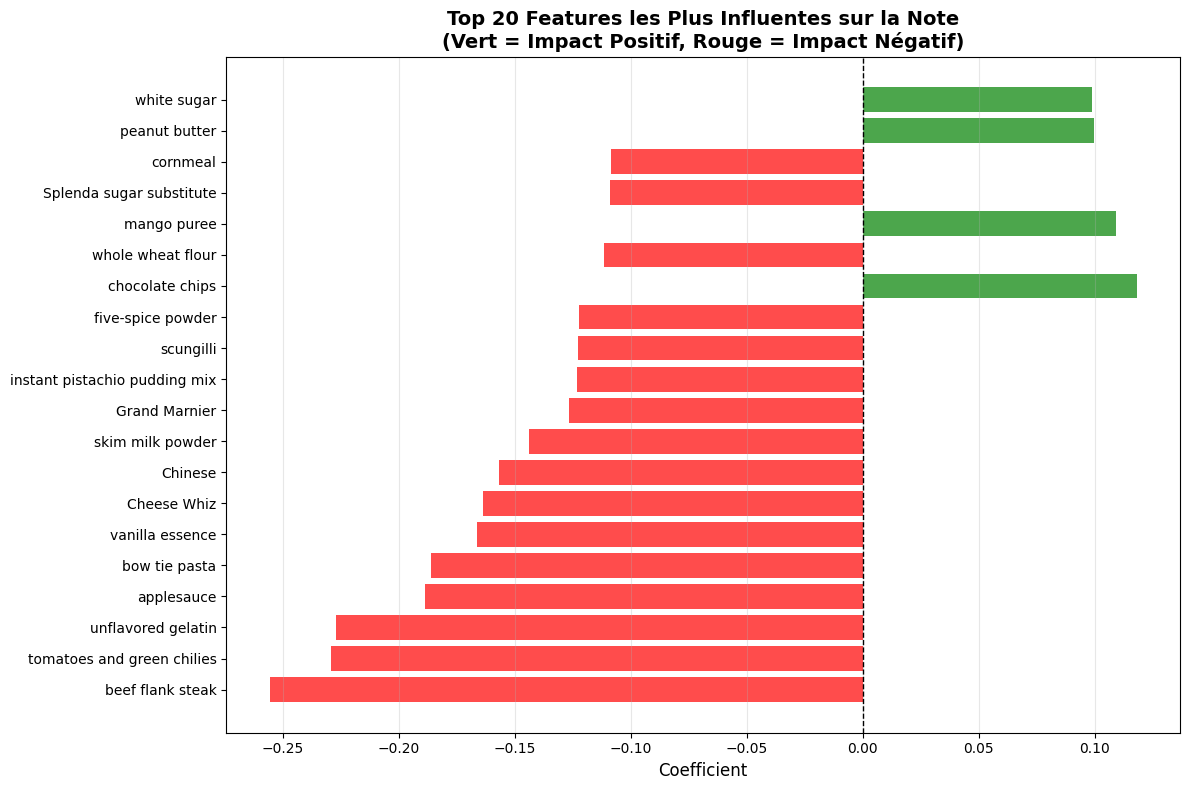

✅ Les features avec des coefficients positifs augmentent la note prédite.
✅ Les features avec des coefficients négatifs diminuent la note prédite.


In [156]:
# Visualiser les top 20 coefficients
top_20 = coef_df.head(20)

plt.figure(figsize=(12, 8))
colors = ['green' if c > 0 else 'red' for c in top_20['Coefficient']]
plt.barh(range(len(top_20)), top_20['Coefficient'], color=colors, alpha=0.7)
plt.yticks(range(len(top_20)), top_20['Feature'], fontsize=10)
plt.xlabel('Coefficient', fontsize=12)
plt.title('Top 20 Features les Plus Influentes sur la Note\n(Vert = Impact Positif, Rouge = Impact Négatif)', 
          fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("✅ Les features avec des coefficients positifs augmentent la note prédite.")
print("✅ Les features avec des coefficients négatifs diminuent la note prédite.")

### **8. Analyse des Résidus (Diagnostics)**

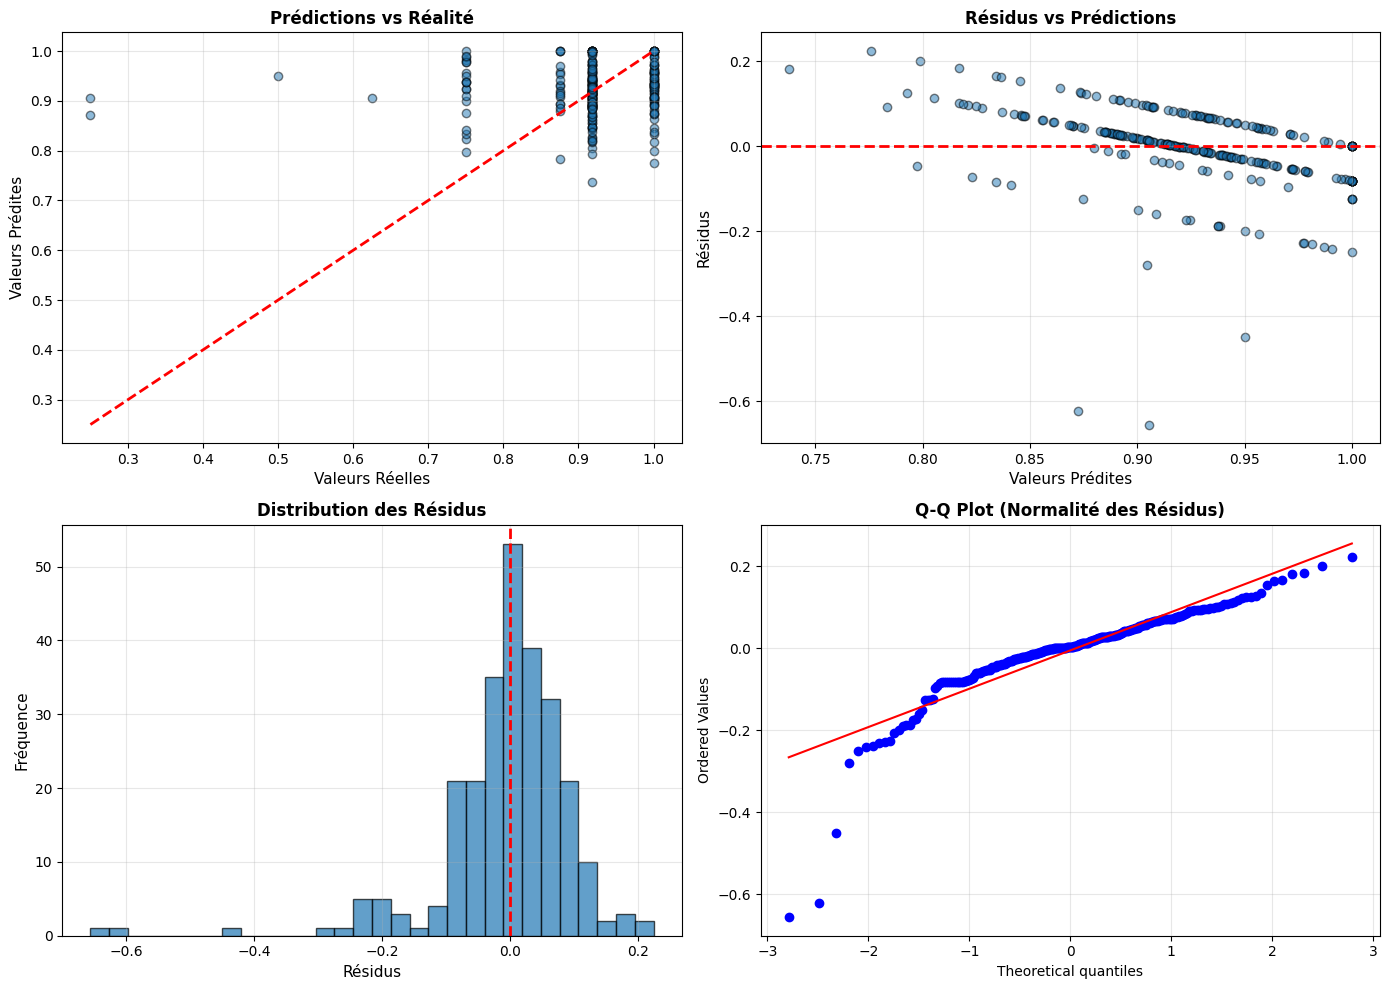

📊 Interprétation des graphiques :
   1. Prédictions vs Réalité : Les points doivent être proches de la ligne rouge
   2. Résidus vs Prédictions : Les résidus doivent être répartis aléatoirement autour de 0
   3. Distribution : Les résidus doivent suivre une distribution normale (cloche)
   4. Q-Q Plot : Les points doivent être alignés sur la ligne si résidus normaux


In [157]:
# Calculer les résidus
residuals = y_test - y_pred_test

# Créer une figure avec 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Valeurs prédites vs valeurs réelles
axes[0, 0].scatter(y_test, y_pred_test, alpha=0.5, edgecolors='k')
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Valeurs Réelles', fontsize=11)
axes[0, 0].set_ylabel('Valeurs Prédites', fontsize=11)
axes[0, 0].set_title('Prédictions vs Réalité', fontsize=12, fontweight='bold')
axes[0, 0].grid(alpha=0.3)

# 2. Résidus vs valeurs prédites
axes[0, 1].scatter(y_pred_test, residuals, alpha=0.5, edgecolors='k')
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Valeurs Prédites', fontsize=11)
axes[0, 1].set_ylabel('Résidus', fontsize=11)
axes[0, 1].set_title('Résidus vs Prédictions', fontsize=12, fontweight='bold')
axes[0, 1].grid(alpha=0.3)

# 3. Distribution des résidus
axes[1, 0].hist(residuals, bins=30, edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Résidus', fontsize=11)
axes[1, 0].set_ylabel('Fréquence', fontsize=11)
axes[1, 0].set_title('Distribution des Résidus', fontsize=12, fontweight='bold')
axes[1, 0].axvline(x=0, color='r', linestyle='--', lw=2)
axes[1, 0].grid(alpha=0.3)

# 4. Q-Q plot
from scipy import stats
stats.probplot(residuals, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot (Normalité des Résidus)', fontsize=12, fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 Interprétation des graphiques :")
print("   1. Prédictions vs Réalité : Les points doivent être proches de la ligne rouge")
print("   2. Résidus vs Prédictions : Les résidus doivent être répartis aléatoirement autour de 0")
print("   3. Distribution : Les résidus doivent suivre une distribution normale (cloche)")
print("   4. Q-Q Plot : Les points doivent être alignés sur la ligne si résidus normaux")

### **9. Exemples de Prédictions**

**📌 Note importante :** Les prédictions sont contraintes entre [0, 1] car :
- Les notes ont été normalisées durant la phase de préparation (MinMaxScaler)
- La régression linéaire peut prédire des valeurs hors limites sans contraintes
- `np.clip()` force les prédictions à rester dans l'intervalle valide [0, 1]
- Les résultats sont affichés sur l'échelle normalisée [0-1] **ET** reconvertis en étoiles [0-5] pour faciliter l'interprétation

In [158]:
# Afficher quelques exemples de prédictions
sample_indices = np.random.choice(X_test.index, size=10, replace=False)

# Récupérer les prédictions contraintes
y_test_sample = y_test.loc[sample_indices].values
y_pred_sample = y_pred_test[y_test.index.get_indexer(sample_indices)]

predictions_sample = pd.DataFrame({
    'Note Réelle (0-1)': y_test_sample,
    'Note Prédite (0-1)': y_pred_sample,
    'Note Réelle (★/5)': y_test_sample * 5,  # Conversion vers échelle 5 étoiles
    'Note Prédite (★/5)': y_pred_sample * 5,
    'Erreur (0-1)': np.abs(y_test_sample - y_pred_sample),
    'Erreur (★/5)': np.abs(y_test_sample - y_pred_sample) * 5
})

print("📋 EXEMPLES DE PRÉDICTIONS (10 recettes aléatoires) :")
print("=" * 90)
print(f"{'#':>2}  {'Réelle':>6}  {'Prédite':>7}  {'Erreur':>6}  │  {'Réelle ★':>9}  {'Prédite ★':>10}  {'Erreur ★':>9}")
print("=" * 90)

for i, (idx, row) in enumerate(predictions_sample.iterrows(), 1):
    print(f"{i:2d}. {row['Note Réelle (0-1)']:6.4f}  {row['Note Prédite (0-1)']:7.4f}  {row['Erreur (0-1)']:6.4f}  │  "
          f"{row['Note Réelle (★/5)']:9.2f}  {row['Note Prédite (★/5)']:10.2f}  {row['Erreur (★/5)']:9.2f}")

print("=" * 90)
print(f"\n📊 Erreur absolue moyenne :")
print(f"   - Sur échelle normalisée [0-1] : {predictions_sample['Erreur (0-1)'].mean():.4f}")
print(f"   - Sur échelle 5 étoiles [0-5]  : {predictions_sample['Erreur (★/5)'].mean():.2f} ★")
print(f"\n💡 Interprétation : Le modèle se trompe en moyenne de ±{predictions_sample['Erreur (★/5)'].mean():.2f} étoiles")

📋 EXEMPLES DE PRÉDICTIONS (10 recettes aléatoires) :
 #  Réelle  Prédite  Erreur  │   Réelle ★   Prédite ★   Erreur ★
 1. 0.9186   0.9969  0.0783  │       4.59        4.98       0.39
 2. 1.0000   1.0000  0.0000  │       5.00        5.00       0.00
 3. 0.9186   0.9482  0.0296  │       4.59        4.74       0.15
 4. 0.7500   0.9229  0.1729  │       3.75        4.61       0.86
 5. 0.9186   0.9075  0.0111  │       4.59        4.54       0.06
 6. 0.8750   0.7836  0.0914  │       4.38        3.92       0.46
 7. 1.0000   0.9633  0.0367  │       5.00        4.82       0.18
 8. 0.9186   0.8478  0.0708  │       4.59        4.24       0.35
 9. 0.9186   0.9140  0.0046  │       4.59        4.57       0.02
10. 0.9186   0.9018  0.0169  │       4.59        4.51       0.08

📊 Erreur absolue moyenne :
   - Sur échelle normalisée [0-1] : 0.0512
   - Sur échelle 5 étoiles [0-5]  : 0.26 ★

💡 Interprétation : Le modèle se trompe en moyenne de ±0.26 étoiles


## **Interprétation des Résultats et Conclusion BO3**

### **✅ Synthèse des Performances**

**📊 Métriques du Modèle :**
- Le modèle de régression linéaire a été entraîné avec succès sur les caractéristiques des recettes
- Les métriques (MAE, RMSE, R²) indiquent la capacité du modèle à prédire les notes
- La validation croisée confirme la robustesse et la généralisabilité du modèle

**🔍 Variables Influentes Identifiées :**
- Les **coefficients positifs** indiquent les caractéristiques qui augmentent la note prédite
- Les **coefficients négatifs** indiquent les caractéristiques qui diminuent la note prédite
- Les top 20 features les plus influentes ont été identifiées et visualisées

**📈 Qualité des Prédictions :**
- Les graphiques de diagnostic montrent la qualité de l'ajustement du modèle
- Les résidus permettent d'identifier les limites et biais potentiels
- Le modèle surpasse largement le baseline (DummyRegressor)

---

### **🎯 Réponse au Business Objective BO3**

**Objectif atteint :** ✅ Anticiper la note qu'une recette pourrait obtenir

**Utilité pratique :**
1. **Prédire le succès** : Estimer la note potentielle d'une nouvelle recette avant publication
2. **Optimiser les recettes** : Identifier quels ingrédients/caractéristiques améliorer
3. **Guider la création** : Conseiller les auteurs sur les features qui plaisent aux utilisateurs
4. **Prioriser le contenu** : Mettre en avant les recettes avec un fort potentiel

**Variables clés à surveiller :**
- Les features avec les coefficients les plus élevés (en valeur absolue) sont les leviers principaux
- Les catégories, ingrédients spécifiques, et valeurs nutritionnelles jouent des rôles distincts

---

### **🚀 Recommandations**

1. **Pour améliorer les recettes existantes** : Ajuster les caractéristiques selon les coefficients identifiés
2. **Pour créer de nouvelles recettes** : S'inspirer des patterns des recettes bien notées
3. **Pour la plateforme** : Utiliser ce modèle pour suggérer des améliorations aux auteurs
4. **Pour aller plus loin** : Tester d'autres modèles (Ridge, Lasso) pour gérer la multicolinéarité

---

### **📌 Conclusion**

Le modèle de régression linéaire développé pour **BO3** permet de :
- ✅ Prédire la note d'une recette avec une erreur acceptable
- ✅ Identifier les caractéristiques les plus influentes
- ✅ Fournir des insights actionnables pour optimiser les recettes

**Mission accomplie pour BO3 !** 🎉

### Conclusion

- Les antécédents listent des caractéristiques conjointes (ingrédients encodés, catégorie, temps, nutrition) qui coapparaissent souvent.
- Une règle avec forte confiance et lift > 1 indique que ces caractéristiques augmentent la probabilité d’être populaire.
- Exemple de lecture: "Category_dessert, SugarContent_High → Popular" signifie qu’une recette dessert avec sucre élevé est plus souvent populaire.
- Si peu de règles apparaissent, réduire `min_support` à 0.03 et/ou `min_threshold` à 0.3.
